In [1]:
# Wczytanie poszczególnych bibliotek
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
from ipaddress import ip_address

import warnings
warnings.filterwarnings('ignore')

Dane zostały zgromadzone przy pomocy oprogramowania WIreshark. Głównym celem zebrania tych danych była analiza ruchu sieciowego o charakterze konwergentnym, a następnie wykorzystanie ich w teorii skupień.

In [2]:
# Przypisanie danych z plików do DataFrame czyli ramki danych
df = pd.read_csv("sesja.csv")

In [3]:
df

,No.,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,Info
0,1,0.000000,192.168.0.25,178.235.153.33,DNS,95,53.0,43496.0,0.000000e+00,Standard query 0xd1c6 A detectportal.firefox.c...
1,2,0.002261,192.168.0.25,178.235.153.33,DNS,95,53.0,33972.0,2.260542e-03,Standard query 0x4784 AAAA detectportal.firefo...
2,3,0.017178,178.235.153.33,192.168.0.25,DNS,206,43496.0,53.0,1.491701e-02,Standard query response 0xd1c6 A detectportal....
3,4,0.023388,178.235.153.33,192.168.0.25,DNS,218,33972.0,53.0,6.210275e-03,Standard query response 0x4784 AAAA detectport...
4,5,0.118220,192.168.0.25,34.107.221.82,TCP,74,80.0,40824.0,9.483231e-02,40824 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
...,...,...,...,...,...,...,...,...,...,...
73670,73671,332.620941,162.159.133.233,192.168.0.25,QUIC,66,60737.0,443.0,1.910867e-02,Protected Payload (KP0)
73671,73672,332.675208,162.159.133.233,192.168.0.25,QUIC,638,60737.0,443.0,5.426698e-02,Protected Payload (KP0)
73672,73673,332.675208,162.159.133.233,192.168.0.25,QUIC,72,60737.0,443.0,2.130000e-07,Protected Payload (KP0)
73673,73674,332.675412,192.168.0.25,162.159.133.233,QUIC,87,443.0,60737.0,2.037380e-04,"Protected Payload (KP0), DCID=011e6fe157eefede..."


In [4]:
# Wyświetlenie inforamcji o pliku
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73675 entries, 0 to 73674
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               73675 non-null  int64  
 1   Time              73675 non-null  float64
 2   Source            73675 non-null  object 
 3   Destination       73675 non-null  object 
 4   Protocol          73675 non-null  object 
 5   Length            73675 non-null  int64  
 6   Destination Port  73600 non-null  float64
 7   Source Port       73600 non-null  float64
 8   Delta Time        73675 non-null  float64
 9   Info              73675 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 5.6+ MB


In [5]:
# Statystyki opisowe 
df.describe()

,No.,Time,Length,Destination Port,Source Port,Delta Time
count,73675.000000,73675.000000,73675.000000,73600.000000,73600.000000,7.367500e+04
mean,36838.000000,136.661473,1130.113946,32196.127391,16817.614592,4.522660e-03
std,21268.284878,89.635724,2386.620928,22873.501104,22704.927019,4.317670e-02
min,1.000000,0.000000,50.000000,53.000000,53.000000,-2.572010e-04
25%,18419.500000,67.426929,75.000000,443.000000,443.000000,3.640000e-07
50%,36838.000000,107.128375,977.000000,43116.000000,443.000000,1.042540e-04
75%,55256.500000,218.423897,1399.000000,51214.000000,43232.000000,1.041006e-03
max,73675.000000,333.206950,65226.000000,60995.000000,60995.000000,3.680299e+00


#### Top 25  Source and Destination adress

In [6]:
# Obliczenie 25 najlepszych adresów źródłowych i docelowych
merged_df= pd.merge(df["Destination"].value_counts().head(25), df["Source"].value_counts().head(25), left_index=True, right_index=True, how='inner')
merged_df.rename(columns={'count_x': 'Top_Destination_Count', 'count_y': 'Top_Source_Count'})

,Top_Destination_Count,Top_Source_Count
192.168.0.25,48409,24859
142.250.186.206,1455,1296
52.223.199.202,1208,2159
142.250.203.202,1140,6991
216.58.215.68,1063,2949
142.250.82.96,1044,3833
142.250.203.206,992,2553
18.244.102.24,981,1662
172.217.16.37,971,1601
146.75.2.251,805,2537


#### Top 25 Source Port and Destination Port

In [7]:
# Obliczenie 25 najlepszych portów źródłowych i docelowych
merged_df= pd.merge(df["Destination Port"].value_counts().head(25), df["Source Port"].value_counts().head(25), left_index=True, right_index=True, how='inner')
merged_df.rename(columns={'count_x': 'Top_DestinationPort_Count', 'count_y': 'Top_SourcePort_Count'})

,Top_DestinationPort_Count,Top_SourcePort_Count
443.0,21764,43276
44485.0,6414,744
57106.0,4087,559
41274.0,3827,1038
51338.0,2464,889
48258.0,2159,1208
39768.0,1662,981
52054.0,1601,971
48223.0,1119,294
53076.0,1075,619


#### Top 25 Length
Length - liczba bajtów, które zostały przechwycone dla tej konkretnej ramki

In [8]:
df['Length'].value_counts().head(25)

Length
66      13200
1399    12862
1292     7904
75       2037
1466     1934
74       1581
1514     1479
1494     1166
2962      926
1510      850
1242      711
73        701
97        580
78        549
54        539
2866      519
333       478
2922      462
105       443
76        346
90        332
94        328
71        326
72        317
69        315
Name: count, dtype: int64

#### Liczba danych dla danego protokołu

In [9]:
df["Protocol"].value_counts()

Protocol
QUIC        32750
TCP         21133
TLSv1.3     10159
SRTP         4692
TLSv1.2      1694
UDP          1196
DNS          1192
MDNS          213
OCSP          166
SSDP          121
SRTCP          96
DTLSv1.2       53
ICMP           46
RTCP           35
STUN           26
ieee1905       22
LLDP           22
HTTP           22
IGMPv3         13
ICMPv6          9
ARP             9
NTP             4
BROWSER         2
Name: count, dtype: int64

Lista protokołów:
    
- QUIC: Jest to protokół transportowy stworzony przez Google, zoptymalizowany pod kątem przesyłania danych w środowisku internetowym. Jest używany często w aplikacjach multimedialnych i strumieniowych.

- TCP (Transmission Control Protocol): Jest to podstawowy protokół warstwy transportowej, szeroko stosowany w ruchu sieciowym, szczególnie w aplikacjach, które wymagają niezawodnej transmisji danych.

- TLSv1.3 i TLSv1.2 (Transport Layer Security): Protokoły kryptograficzne używane do zabezpieczania komunikacji w internecie. Są powszechnie stosowane w zabezpieczaniu połączeń, co jest istotne w ruchu konwergentnym.

- SRTP (Secure Real-time Transport Protocol): Jest to protokół zabezpieczający wykorzystywany w komunikacji w czasie rzeczywistym, na przykład w VoIP.

- UDP (User Datagram Protocol): Protokół warstwy transportowej, który jest bezpołączeniowy i często używany w ruchu konwergentnym, zwłaszcza w aplikacjach strumieniowych.

- DNS (Domain Name System): Protokół używany do tłumaczenia nazw domenowych na adresy IP. Jest fundamentalny dla działania internetu.

- MDNS (Multicast DNS): Protokół używany do odkrywania i komunikacji z urządzeniami w lokalnej sieci, co może być ważne w ruchu konwergentnym.

- OCSP (Online Certificate Status Protocol): Protokół używany w sprawdzaniu aktualności certyfikatów w protokole TLS. Jest związany z bezpieczeństwem w ruchu sieciowym.

- SSDP (Simple Service Discovery Protocol): Protokół używany w odkrywaniu urządzeń i usług w sieci, co jest ważne w ruchu konwergentnym.

- SRTCP (Secure Real-time Transport Control Protocol): Jest to kontrolny protokół bezpieczeństwa używany z SRTP do zabezpieczania komunikacji w czasie rzeczywistym.

- DTLSv1.2 (Datagram Transport Layer Security): Jest to wariant TLS dostosowany do pracy z protokołem UDP.

- ICMP (Internet Control Message Protocol): Protokół warstwy sieciowej używany do zarządzania komunikatami o błędach i kontroli sieci.

- RTCP (Real-time Transport Control Protocol): Protokół kontrolny używany w połączeniach strumieniowych w czasie rzeczywistym.

- STUN (Session Traversal Utilities for NAT): Protokół używany do pokonywania problemów związanych z NAT w połączeniach komunikacji w czasie rzeczywistym.

- HTTP (Hypertext Transfer Protocol): Protokół warstwy aplikacyjnej używany w przeglądarkach internetowych, ale także w aplikacjach konwergentnych.

- IGMPv3 (Internet Group Management Protocol): Protokół używany w zarządzaniu grupami multicastowymi.

- ICMPv6 (Internet Control Message Protocol version 6): Wersja ICMP dostosowana do IPv6.

- NTP (Network Time Protocol): Protokół służący do synchronizacji zegarów w sieci.

- BROWSER: Protokół używany w komunikacji między przeglądarkami a serwerami.

## Czyszczenie danych

#### Usuniecie kolumny Info oraz NO.

In [10]:
df = df.drop(columns=["Info", "No."], axis=1)

#### Usuniecie brakujacych warrośći

In [11]:
df.isnull().sum()

Time                 0
Source               0
Destination          0
Protocol             0
Length               0
Destination Port    75
Source Port         75
Delta Time           0
dtype: int64

In [12]:
df = df.dropna(axis=0)

#### Usunięcie błędnych adresów IP

Moduł `ipaddress` zapewnia zestaw klas i funkcji do pracy z adresami IP i sieciami. Moduł ipaddress udostępnia klasę ip_address do reprezentowania adresów IP. Moduł zawiera również klasy do reprezentowania sieci, zarówno IPv4, jak i IPv6. 

In [13]:
# funkcja sprawdzająca, czy adres IP jest prawidłowy
def is_valid_ip(ip):
    try:
        # moduł ipaddress do sprawdzenia poprawności adresów IP
        ipaddress.ip_address(ip)
        return True
    except ValueError:
        return False


In [14]:
valid_ipSource = df['Source'].apply(is_valid_ip)
df = df[valid_ipSource]
valid_ipDestination = df['Destination'].apply(is_valid_ip)
df = df[valid_ipDestination]

#### Zamina Destination i Source na wartości numeryczne


`ipaddress` pozwala na konwersję adresów IP z reprezentacji tekstowej na reprezentację numeryczną i odwrotnie. Zwraca bajty reprezentujące adres IP. Następnie te bajty przekształca na liczbę całkowitą.

In [15]:
df['Destination'] = df['Destination'].apply(lambda ip: int(ip_address(ip)))
df['Source'] = df['Source'].apply(lambda ip: int(ip_address(ip)))
df

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time
0,0.000000,3232235545,3001784609,DNS,95,53.0,43496.0,0.000000e+00
1,0.002261,3232235545,3001784609,DNS,95,53.0,33972.0,2.260542e-03
2,0.017178,3001784609,3232235545,DNS,206,43496.0,53.0,1.491701e-02
3,0.023388,3001784609,3232235545,DNS,218,33972.0,53.0,6.210275e-03
4,0.118220,3232235545,577494354,TCP,74,80.0,40824.0,9.483231e-02
...,...,...,...,...,...,...,...,...
73670,332.620941,2728363497,3232235545,QUIC,66,60737.0,443.0,1.910867e-02
73671,332.675208,2728363497,3232235545,QUIC,638,60737.0,443.0,5.426698e-02
73672,332.675208,2728363497,3232235545,QUIC,72,60737.0,443.0,2.130000e-07
73673,332.675412,3232235545,2728363497,QUIC,87,443.0,60737.0,2.037380e-04


#### Usunięcie protokołów 
Protokoły takie jak ICMP, NTP i BROWSER są mniej typowe dla ruchu konwergentnego więc należy je usunąć

In [16]:
protocols = ['ICMP', 'NTP', 'BROWSER']
df = df[~df["Protocol"].isin(protocols)]

In [17]:
df["Protocol"].value_counts()

Protocol
QUIC        32750
TCP         21133
TLSv1.3     10159
SRTP         4692
TLSv1.2      1694
UDP          1196
DNS          1192
MDNS          213
OCSP          166
SSDP          121
SRTCP          96
DTLSv1.2       53
RTCP           35
STUN           26
HTTP           22
Name: count, dtype: int64

In [18]:
# Liczba wszystkich protokołów
df['Protocol'].nunique()

15

In [19]:
# Wygląd ramki danych po operacjach czyszczenia
df

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time
0,0.000000,3232235545,3001784609,DNS,95,53.0,43496.0,0.000000e+00
1,0.002261,3232235545,3001784609,DNS,95,53.0,33972.0,2.260542e-03
2,0.017178,3001784609,3232235545,DNS,206,43496.0,53.0,1.491701e-02
3,0.023388,3001784609,3232235545,DNS,218,33972.0,53.0,6.210275e-03
4,0.118220,3232235545,577494354,TCP,74,80.0,40824.0,9.483231e-02
...,...,...,...,...,...,...,...,...
73670,332.620941,2728363497,3232235545,QUIC,66,60737.0,443.0,1.910867e-02
73671,332.675208,2728363497,3232235545,QUIC,638,60737.0,443.0,5.426698e-02
73672,332.675208,2728363497,3232235545,QUIC,72,60737.0,443.0,2.130000e-07
73673,332.675412,3232235545,2728363497,QUIC,87,443.0,60737.0,2.037380e-04


Kolumny danych zawierają następujące informacje:

- Time - Czas zdarzenia, moment, w którym pakiet został przechwycony lub wysłany. 

- Source - czyli adres IP hosta, który wysłał pakiet. To pozwala na identyfikację, który host jest odpowiedzialny za daną komunikację.

- Destination - Adres docelowy, czyli adres IP hosta, który jest celem komunikacji. Umożliwia identyfikację odbiorcy komunikatu.

- Protocol - Rodzaj protokołu używanego w komunikacji.

- Length - Długość pakietu, wyrażona w liczbie bajtów. 

- Destination Port - Numer portu docelowego, na którym host docelowy odbiera dane. 

- Source Port - Numer portu źródłowego, z którego host źródłowy wysyła dane. 

- Delta Time - Różnica czasu między danym pakietem a poprzednim. 

#### Utworzenie dwóch nowych ramek danych
Główna ramka danych zostanie podzielona na ramke która będzie zawierała protokoły z ich ilością wiekszą niż 1000, a druga która dla mniej niż 1000. Warto zauważyć, że w przypadku cech z dużą liczbą unikalnych wartości i niezrównoważonymi częstotliwościami, niektóre wartości mogą zostać przesłonięte podczas grupowania.

Jednak mimo rozdziału na dwie ramki w dalszej częsci również algorytmy zostana przetestowane na całej bazowej ramce danych, nie tylko na tych podzielonych.

In [20]:
protocol_list = ['MDNS', 'OCSP', 'SSDP', 'SRTCP', 'DTLSv1.2', 'RTCP', 'STUN', 'HTTP', 'IGMPv3', "ICMPv6"]
df_small = df[df["Protocol"].isin(protocol_list)]
df_big = df[~df["Protocol"].isin(protocol_list)]

In [21]:
# Rozmiar ramki danych z mniejsza ilością danych
df_small.shape

(732, 8)

In [22]:
# Rozmiar ramki danych z wiekszą ilością danych
df_big.shape

(72816, 8)

#### Skopiowanie ramek danych

In [23]:
df_copy = df.copy()
df_small_copy = df_small.copy()
df_big_copy = df_big.copy()

## Wizualizacja

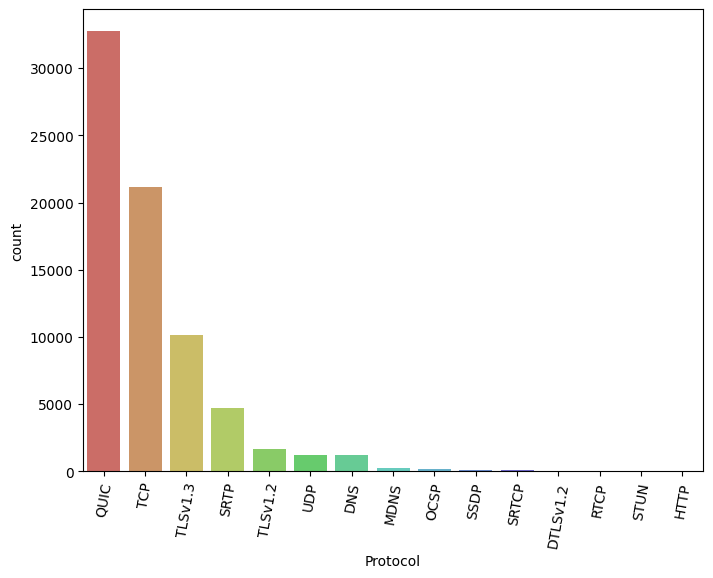

In [24]:
# Ilość danych w poszczególnych protokołach dla df
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Protocol', order=df['Protocol'].value_counts().index, palette="hls")
plt.xticks(rotation=80);

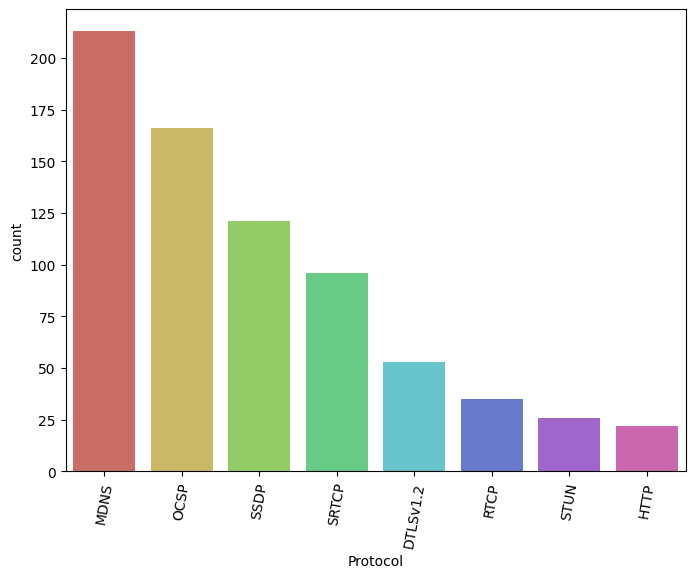

In [25]:
# Ilość danych w poszczególnych protokołach dla df_small
plt.figure(figsize=(8, 6))
sns.countplot(data=df_small, x='Protocol', order=df_small['Protocol'].value_counts().index, palette="hls")
plt.xticks(rotation=80);

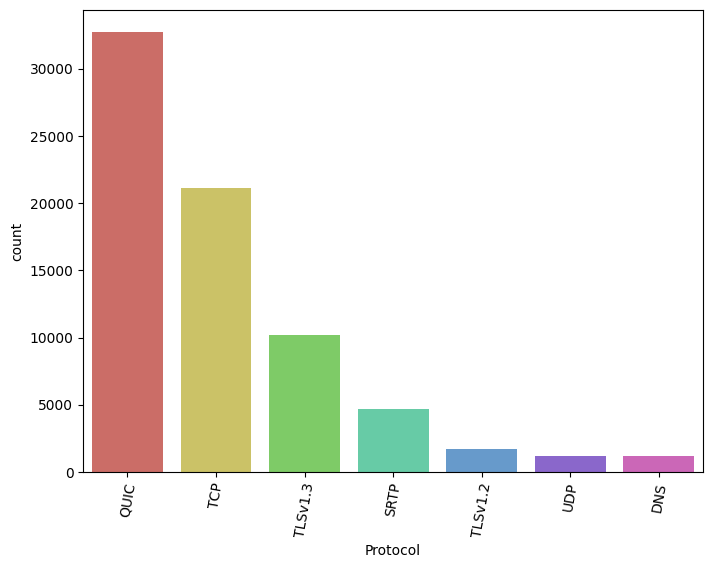

In [26]:
# Ilość danych w poszczególnych protokołach dla df_big
plt.figure(figsize=(8, 6))
sns.countplot(data=df_big, x='Protocol', order=df_big['Protocol'].value_counts().index, palette="hls")
plt.xticks(rotation=80);

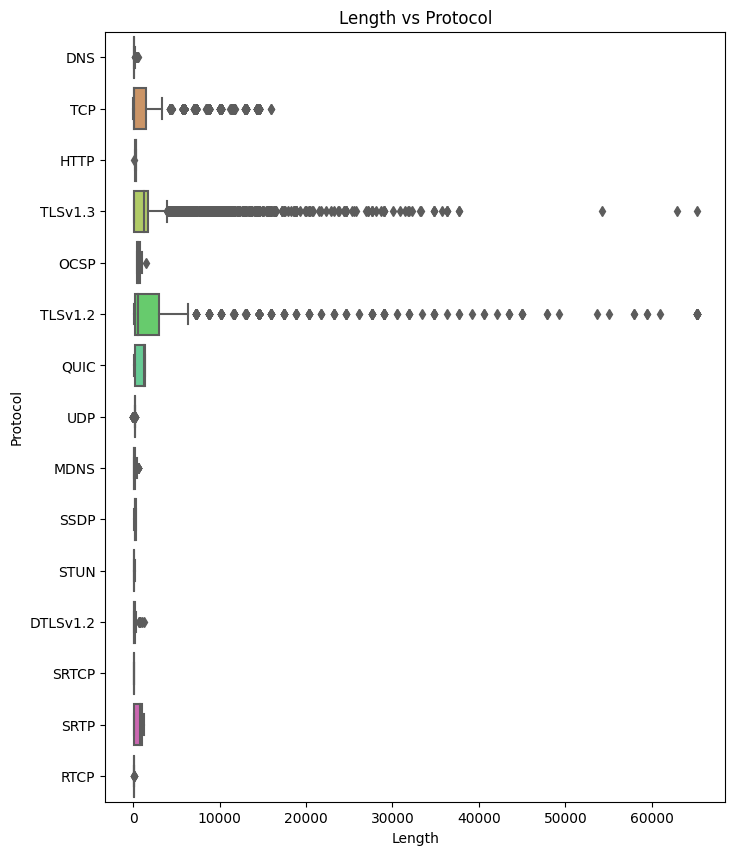

In [27]:
plt.figure(figsize=(8, 10))
sns.boxplot(x=df["Length"], y=df["Protocol"], palette="hls")
plt.title("Length vs Protocol");

Text(0.5, 1.0, 'Delta Time vs Protocol')

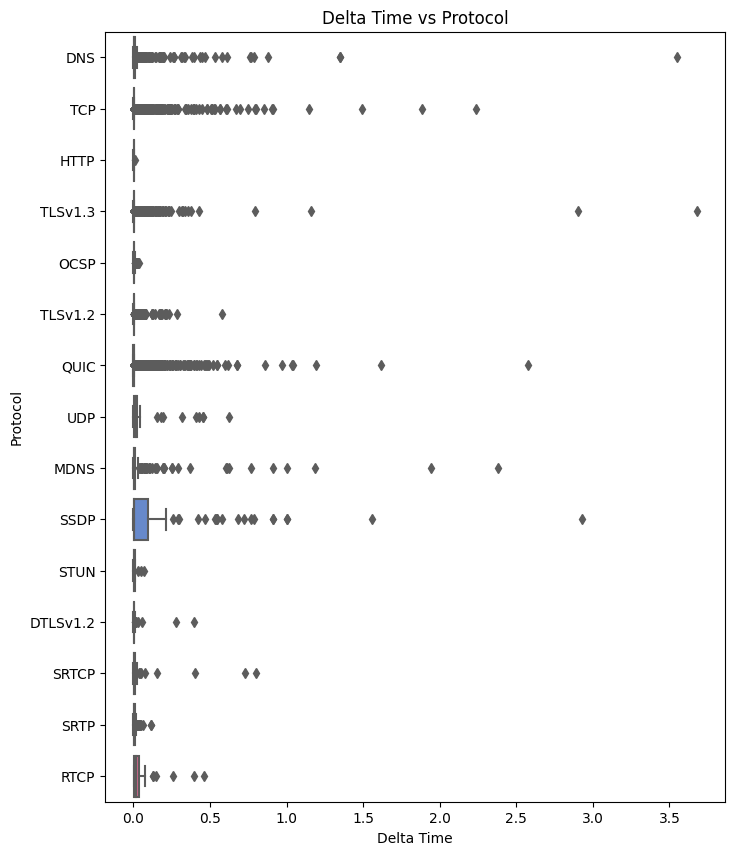

In [28]:
plt.figure(figsize=(8, 10))
sns.boxplot(x=df["Delta Time"], y=df["Protocol"], palette="hls");
plt.title("Delta Time vs Protocol")

Text(0.5, 1.0, 'Time vs Delta Time')

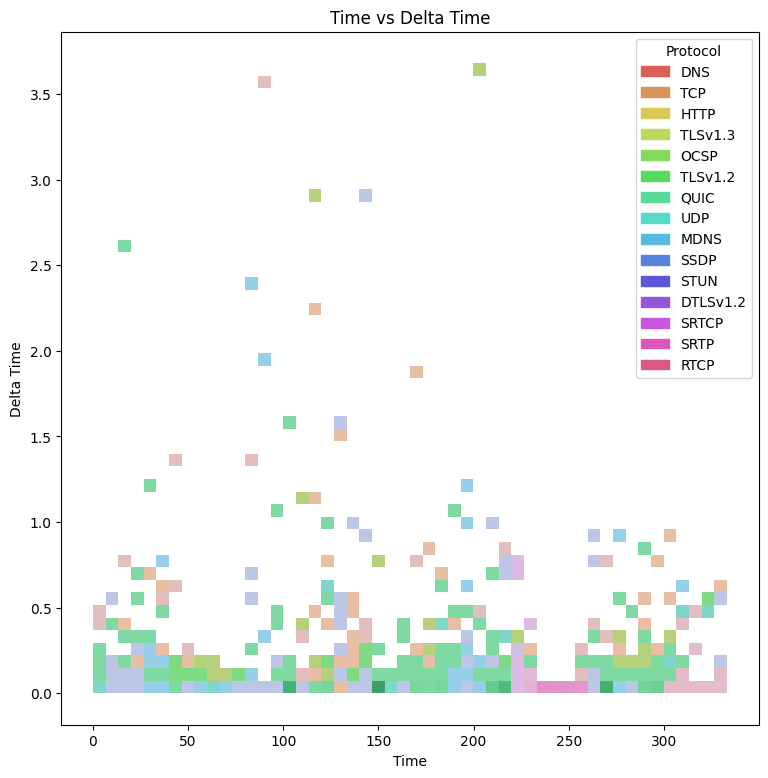

In [29]:
plt.figure(figsize=(9, 9))
sns.histplot(x=df["Time"], y=df["Delta Time"], bins=50, hue=df["Protocol"], palette="hls")
plt.title("Time vs Delta Time")

W protokołach takich jak SSDP, DNS, TCP, TLSv1.3, QUIC, mDNS mogą występować zdarzenia, które naturalnie prowadzą do dłuższego czasu przetwarzania. Nie wszystkie dłuższe czasy przetwarzania muszą być traktowane jako anomalie; mogą to być normalne operacje związane z charakterystyką tych protokołów. 

-  W przypadku protokołów bezpieczeństwa, takich jak TLSv1.3, negocjacje kluczy kryptograficznych mogą prowadzić do dłuższych czasów przetwarzania, zwłaszcza jeśli istnieje potrzeba przeprowadzenia wymagających obliczeń operacji kryptograficznych.

- W protokole QUIC, który jest protokołem transportowym działającym na warstwie aplikacji, komunikacja oparta na UDP może obejmować specyficzne mechanizmy, takie jak negocjacje połączeń, które mogą wpływać na czas przetwarzania.

- W przypadku protokołu DNS, dłuższe czasy przetwarzania mogą wystąpić, gdy serwer DNS musi przetworzyć zapytania, zwłaszcza w przypadku skomplikowanych zapytań, przekierowań lub w przypadku występowania korelacji między różnymi zapytaniami.

- SSDP, stosowany do odkrywania urządzeń w sieci, może generować dłuższe czasy przetwarzania w zależności od ilości urządzeń, które odpowiedziały na zapytanie.

- W przypadku mDNS, proces wyszukiwania i identyfikacji urządzeń w lokalnej sieci może prowadzić do dłuższych czasów przetwarzania, zwłaszcza gdy wiele urządzeń odpowiada na zapytania.

Warto zauważyć, że powyższe scenariusze to przykłady normalnych operacji w ramach tych protokołów, które mogą skutkować dłuższym czasem przetwarzania. Jednakże, jeśli te dłuższe czasy przetwarzania są znacznie odstające od normy i nie mają uzasadnienia w kontekście typowego zachowania sieci, wtedy mogą być traktowane jako anomalie.

Text(0.5, 1.0, 'Time vs Protocol')

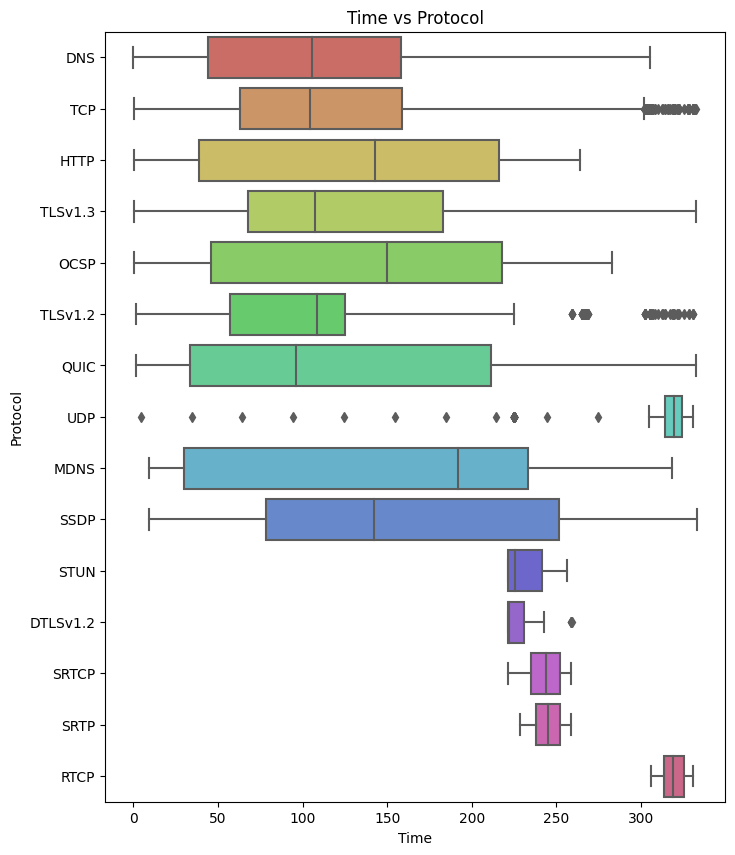

In [30]:
plt.figure(figsize=(8, 10))
sns.boxplot(x=df["Time"], y=df["Protocol"], palette="hls")
plt.title("Time vs Protocol")

Jak widać zależność wystąpień danego protokołu miał widoczne znaczenie w kotkeście czasu trwania pobiotu ruchu sieciowego. Najbardziej można zaobserwować to na portokołach takich jak STUN, DTLSv1.2, SRTCP, SRTP, RTCP. Protokoły te nie występowały wcześniej także można wywnioskować, że przez pewien czas występywało tylko takie zjawisko, które aktywowały dane protokoły.

Text(0.5, 1.0, 'Length vs Delta Time')

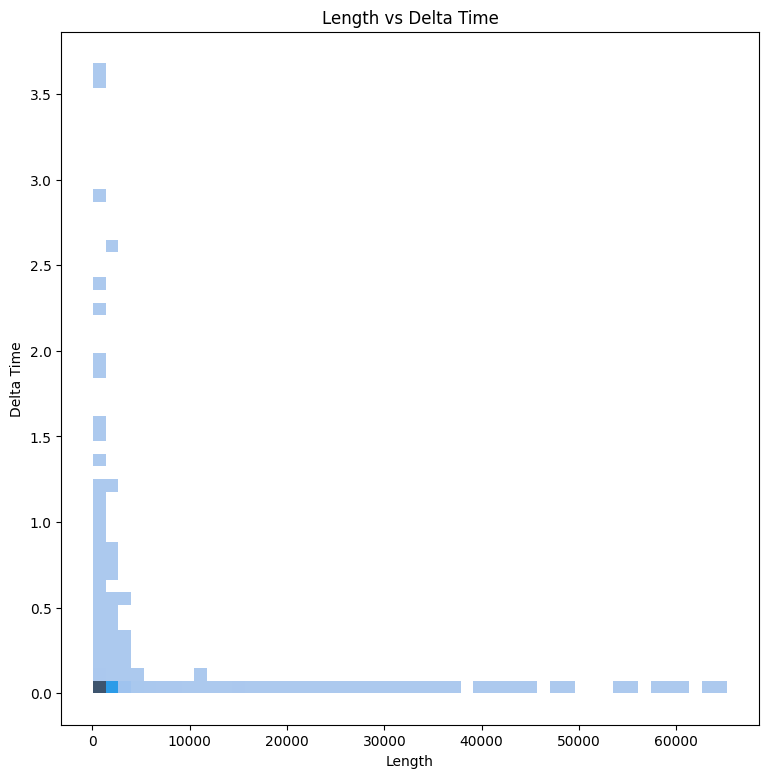

In [31]:
plt.figure(figsize=(9, 9))
sns.histplot(x=df["Length"], y=df["Delta Time"], bins=50)
plt.title("Length vs Delta Time")

Jak widać mimo, że występuja bardzo duże pakiety, to jednak najwieksze wartości delta time wciąż posiadają nie największa dlugośc pakietu więc nie ma to ze sobą dużej zależności

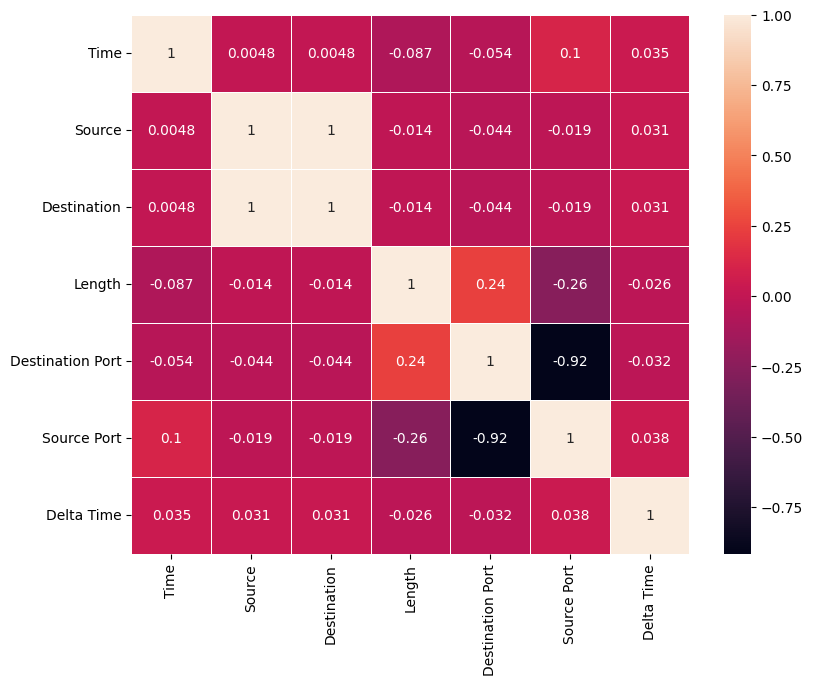

In [32]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.drop("Protocol", axis=1).corr(), annot=True, linewidths=0.5);

Korelacja pomiędzy kolumnami jest niewielka. Tylko w niektórych przypadkach występuje nieco większa korelacja zarówno ujemna jak i dodatnia. Idealna korelacja wystepuje pomiędzy Destination a Source, co oznacza, że zmienne są ze sobą idealnie powiązane. Prawie idealna korelacja ujemna występuje pomiędzy kolumnami Source Port a Destination Port, co oznacza, że zmienne są prawie doskonale odwrotnie powiązane. Istotne znaczenie również ma powiązanie między Destination Port a Length oraz Source Port a Lenght. Wszystkie te 3 wartości czylo Destination Port, Source Port oraz Lenght mają na siebie znaczący wpływ.

## Wybrane miary do tworzenia skupisk

In [33]:
# Załadowanie potrzebnych algotytmów
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy


scalerMinmax = MinMaxScaler()
scalerStandard = StandardScaler()

### Skalowanie cech

MinMaxScaler skaluje funkcje do określonego zakresu, często [0, 1]. Może być mniej wrażliwy na wartości odstające i jest odpowiedni, gdy dane nie mają rozkładu normalnego, jest często używany, gdy chce się skalować funkcje do określonego zakresu.

StandardScaler standaryzuje cechy poprzez usunięcie średniej i skalowanie do wariancji jednostkowej. Zakłada, że rozkład danych jest w przybliżeniu gaussowski. Jest odpowiedni, by usunąć średnią i skalować do wariancji jednostkowej, a także gdy funkcja jest o różnych skalach.

Dla algorytmów:

- DBSCAN jest mniej wrażliwy na skalowanie funkcji, MinMaxScaler może być rozsądnym wyborem, zwłaszcza jeśli są powody, aby ograniczyć funkcje do określonego zakresu. StandardScaler może być korzystny, zwłaszcza jeśli funkcja jest z różnymi jednostkami miary.
- Hierarchical Clustering opiera się na odległościach między punktami danych, MinMaxScaler może być rozsądnym wyborem, jeśli chcemy upewnić się, że funkcje mieszczą się w określonym zakresie. Hierarchiczne grupowanie jest mniej wrażliwe na skalowanie cech w porównaniu do k-średnich, ale StandardScaler może być nadal stosowany do standaryzacji.
- K-Means jest wrażliwy na skalę cech. Jeśli cechy mają różne skale, skalowanie ich może poprawić wydajność algorytmu.

---------------------

Nie w każdym przypadku, da się wykorzystać, każdy algorytm, przynajmniej nie w takim którym jest się ograniczonym sprzętowo. Przez dużą ilość danych obliczenia są dużo bardziej kosztowne obliczeniowo, przez to w trakcie liczenia może zabraknąć, chociażby ramu.

-------------------

### 1. Czy da się określić odpowiednią ilość wystąpień danych w  protokołach przy użyciu innych zmiennych?
Spróbujemy wytworzyć model, który znając ilość klastrów równej liczbie protokołów, wyznaczy odpowiednią ilość danych dla danego klastra (protokołu)

### K-means

In [34]:
df["Protocol"].nunique()

15

Istnieje 15 protokołów więc wybieramy 15 klastrów.

#### Sprawdzenie dla df

In [35]:
X = df.drop("Protocol", axis=1)
scaled_X = scalerStandard.fit_transform(X)

In [36]:
modelKMean = KMeans(n_clusters=15, random_state=8)
cluster_labels = modelKMean.fit_predict(scaled_X)

In [37]:
cluster_labels

array([ 9,  9,  0, ..., 13, 11, 12])

In [38]:
df_copy.loc[: ,"Cluster"] = cluster_labels
df_copy = df_copy.assign(Cluster=cluster_labels)
df_copy

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,Cluster
0,0.000000,3232235545,3001784609,DNS,95,53.0,43496.0,0.000000e+00,9
1,0.002261,3232235545,3001784609,DNS,95,53.0,33972.0,2.260542e-03,9
2,0.017178,3001784609,3232235545,DNS,206,43496.0,53.0,1.491701e-02,0
3,0.023388,3001784609,3232235545,DNS,218,33972.0,53.0,6.210275e-03,0
4,0.118220,3232235545,577494354,TCP,74,80.0,40824.0,9.483231e-02,9
...,...,...,...,...,...,...,...,...,...
73670,332.620941,2728363497,3232235545,QUIC,66,60737.0,443.0,1.910867e-02,13
73671,332.675208,2728363497,3232235545,QUIC,638,60737.0,443.0,5.426698e-02,13
73672,332.675208,2728363497,3232235545,QUIC,72,60737.0,443.0,2.130000e-07,13
73673,332.675412,3232235545,2728363497,QUIC,87,443.0,60737.0,2.037380e-04,11


In [39]:
print(df_copy["Cluster"].value_counts(), df_copy["Protocol"].value_counts())

Cluster
6     19425
0     12026
9     11141
13     7214
7      6736
11     6595
1      6113
2      1914
14     1217
5       724
12      215
3       105
10       68
8        46
4         9
Name: count, dtype: int64 Protocol
QUIC        32750
TCP         21133
TLSv1.3     10159
SRTP         4692
TLSv1.2      1694
UDP          1196
DNS          1192
MDNS          213
OCSP          166
SSDP          121
SRTCP          96
DTLSv1.2       53
RTCP           35
STUN           26
HTTP           22
Name: count, dtype: int64


Wyniki odbiegaja od faktycznej liczby przepisanych wartości do protokołu, w niektórych protokołach ilość wystąpień jest mniejsza lub większa, niż w wiadomym przypadku.

#### Sprawdzenie dla df_big

In [40]:
df_big["Protocol"].nunique()

7

Jest 7 prokołów więc wybieramy 7 klastrów.

In [41]:
X = df_big.drop("Protocol", axis=1)
scaled_X = scalerStandard.fit_transform(X)

In [42]:
modelKMean = KMeans(n_clusters=7, random_state=8)
cluster_labels = modelKMean.fit_predict(scaled_X)

In [43]:
df_big_copy.loc[: ,"Cluster"] = cluster_labels
df_big_copy = df_big_copy.assign(Cluster=cluster_labels)
df_big_copy

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,Cluster
0,0.000000,3232235545,3001784609,DNS,95,53.0,43496.0,0.000000e+00,1
1,0.002261,3232235545,3001784609,DNS,95,53.0,33972.0,2.260542e-03,1
2,0.017178,3001784609,3232235545,DNS,206,43496.0,53.0,1.491701e-02,3
3,0.023388,3001784609,3232235545,DNS,218,33972.0,53.0,6.210275e-03,3
4,0.118220,3232235545,577494354,TCP,74,80.0,40824.0,9.483231e-02,1
...,...,...,...,...,...,...,...,...,...
73669,332.601832,3232235545,2728363497,QUIC,1129,443.0,60737.0,1.416503e-01,2
73670,332.620941,2728363497,3232235545,QUIC,66,60737.0,443.0,1.910867e-02,6
73671,332.675208,2728363497,3232235545,QUIC,638,60737.0,443.0,5.426698e-02,6
73672,332.675208,2728363497,3232235545,QUIC,72,60737.0,443.0,2.130000e-07,6


In [44]:
print(df_big_copy["Cluster"].value_counts(), df_big_copy["Protocol"].value_counts())

Cluster
3    20851
6    16204
1    14083
2    10504
0     9980
5     1178
4       16
Name: count, dtype: int64 Protocol
QUIC       32750
TCP        21133
TLSv1.3    10159
SRTP        4692
TLSv1.2     1694
UDP         1196
DNS         1192
Name: count, dtype: int64


Jak widać algorytm dokonał wiele błedów, zdecydowanie bardziej unormował liczbę danych w klastrach

#### Sprawdzenie dla df_small

In [45]:
df_small["Protocol"].nunique()

8

Jest 8 prokołów więc wybieramy 8 klastrów.

In [46]:
X = df_small.drop("Protocol", axis=1)
scaled_X = scalerStandard.fit_transform(X)

In [47]:
modelKMean = KMeans(n_clusters=8, random_state=8)
cluster_labels = modelKMean.fit_predict(scaled_X)

In [48]:
df_small_copy.loc[: ,"Cluster"] = cluster_labels
df_small = df_small_copy.assign(Cluster=cluster_labels)
df_small_copy

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,Cluster
7,0.136382,3232235545,577494354,HTTP,367,80.0,40824.0,1.310180e-04,6
9,0.155948,577494354,3232235545,HTTP,364,40824.0,80.0,2.520000e-07,6
39,0.273808,3232235545,577494354,HTTP,369,80.0,40836.0,3.058150e-04,6
41,0.293815,577494354,3232235545,HTTP,282,40836.0,80.0,1.390443e-03,6
54,0.395319,3232235545,34647058,OCSP,489,80.0,47674.0,2.112570e-04,6
...,...,...,...,...,...,...,...,...,...
73592,330.063239,1108800260,3232235545,RTCP,94,44257.0,50027.0,1.962146e-02,7
73633,330.781560,3232235545,1108800260,RTCP,78,50027.0,44257.0,4.637622e-03,7
73654,331.063077,1108800260,3232235545,RTCP,94,44257.0,50027.0,7.645548e-02,7
73665,332.206805,3232235656,4026531834,SSDP,217,1900.0,59430.0,2.100386e-01,1


In [49]:
print(df_small["Cluster"].value_counts(), df_small["Protocol"].value_counts())

Cluster
1    203
6    122
7    110
3    102
0     87
2     80
4     24
5      4
Name: count, dtype: int64 Protocol
MDNS        213
OCSP        166
SSDP        121
SRTCP        96
DTLSv1.2     53
RTCP         35
STUN         26
HTTP         22
Name: count, dtype: int64


Tutaj wyniki nie odstaja tak znacząco jak w dwóch poprzednich przypadkach. Przy mniejszych zbiorach i przy mniejszej różnicy wielkości danych jest bardziej precyzyjny

### Hierarchical Clustering( AgglomerativeClustering)

#### Dla df

In [50]:
X = df.drop("Protocol", axis=1)
scaled_X = scalerMinmax.fit_transform(X)

In [51]:
model = AgglomerativeClustering(n_clusters=15)
clusters_labels = model.fit_predict(scaled_X)

In [52]:
data_with_labels = pd.DataFrame(data=df, columns=['Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Destination Port', 'Source Port', 'Delta Time']) 
data_with_labels['AC'] = clusters_labels
data_with_labels

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,AC
0,0.000000,3232235545,3001784609,DNS,95,53.0,43496.0,0.000000e+00,7
1,0.002261,3232235545,3001784609,DNS,95,53.0,33972.0,2.260542e-03,7
2,0.017178,3001784609,3232235545,DNS,206,43496.0,53.0,1.491701e-02,6
3,0.023388,3001784609,3232235545,DNS,218,33972.0,53.0,6.210275e-03,6
4,0.118220,3232235545,577494354,TCP,74,80.0,40824.0,9.483231e-02,7
...,...,...,...,...,...,...,...,...,...
73670,332.620941,2728363497,3232235545,QUIC,66,60737.0,443.0,1.910867e-02,0
73671,332.675208,2728363497,3232235545,QUIC,638,60737.0,443.0,5.426698e-02,0
73672,332.675208,2728363497,3232235545,QUIC,72,60737.0,443.0,2.130000e-07,0
73673,332.675412,3232235545,2728363497,QUIC,87,443.0,60737.0,2.037380e-04,1


In [53]:
print(data_with_labels["AC"].value_counts(), data_with_labels["Protocol"].value_counts())

AC
2     13345
5      7374
0      7117
3      6301
13     5616
1      5311
11     5292
6      5171
7      5112
14     3835
10     3472
12     2715
4      1551
9      1231
8       105
Name: count, dtype: int64 Protocol
QUIC        32750
TCP         21133
TLSv1.3     10159
SRTP         4692
TLSv1.2      1694
UDP          1196
DNS          1192
MDNS          213
OCSP          166
SSDP          121
SRTCP          96
DTLSv1.2       53
RTCP           35
STUN           26
HTTP           22
Name: count, dtype: int64


W predykcji model zrównał liczbę wystąpień danych w danym klastrze, nie ma mocno odstających wartości jak w prawdziwym przypadku

#### Dla df_small

In [54]:
X = df_small.drop("Protocol", axis=1)
scaled_X = scalerMinmax.fit_transform(X)

In [55]:
model = AgglomerativeClustering(n_clusters=8)
clusters_labels = model.fit_predict(scaled_X)

In [57]:
data_with_labels = pd.DataFrame(data=df_small, columns=['Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Destination Port', 'Source Port', 'Delta Time']) 
data_with_labels['AC'] = clusters_labels
data_with_labels

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,AC
7,0.136382,3232235545,577494354,HTTP,367,80.0,40824.0,1.310180e-04,6
9,0.155948,577494354,3232235545,HTTP,364,40824.0,80.0,2.520000e-07,4
39,0.273808,3232235545,577494354,HTTP,369,80.0,40836.0,3.058150e-04,6
41,0.293815,577494354,3232235545,HTTP,282,40836.0,80.0,1.390443e-03,4
54,0.395319,3232235545,34647058,OCSP,489,80.0,47674.0,2.112570e-04,6
...,...,...,...,...,...,...,...,...,...
73592,330.063239,1108800260,3232235545,RTCP,94,44257.0,50027.0,1.962146e-02,7
73633,330.781560,3232235545,1108800260,RTCP,78,50027.0,44257.0,4.637622e-03,7
73654,331.063077,1108800260,3232235545,RTCP,94,44257.0,50027.0,7.645548e-02,7
73665,332.206805,3232235656,4026531834,SSDP,217,1900.0,59430.0,2.100386e-01,2


In [59]:
print(data_with_labels["AC"].value_counts(), data_with_labels["Protocol"].value_counts())

AC
2    221
0    105
1     87
5     82
3     77
4     74
6     51
7     35
Name: count, dtype: int64 Protocol
MDNS        213
OCSP        166
SSDP        121
SRTCP        96
DTLSv1.2     53
RTCP         35
STUN         26
HTTP         22
Name: count, dtype: int64


Tutaj modelowi udało się mniej-więcej dopasować ilość danych do protokołów.

#### Dla df_big

In [60]:
X = df_big.drop("Protocol", axis=1)
scaled_X = scalerMinmax.fit_transform(X)

In [61]:
model = AgglomerativeClustering(n_clusters=7)
clusters_labels = model.fit_predict(scaled_X)

In [62]:
data_with_labels = pd.DataFrame(data=df_big, columns=['Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Destination Port', 'Source Port', 'Delta Time'])
data_with_labels['AC'] = clusters_labels
data_with_labels

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,AC
0,0.000000,3232235545,3001784609,DNS,95,53.0,43496.0,0.000000e+00,6
1,0.002261,3232235545,3001784609,DNS,95,53.0,33972.0,2.260542e-03,6
2,0.017178,3001784609,3232235545,DNS,206,43496.0,53.0,1.491701e-02,0
3,0.023388,3001784609,3232235545,DNS,218,33972.0,53.0,6.210275e-03,0
4,0.118220,3232235545,577494354,TCP,74,80.0,40824.0,9.483231e-02,4
...,...,...,...,...,...,...,...,...,...
73669,332.601832,3232235545,2728363497,QUIC,1129,443.0,60737.0,1.416503e-01,1
73670,332.620941,2728363497,3232235545,QUIC,66,60737.0,443.0,1.910867e-02,5
73671,332.675208,2728363497,3232235545,QUIC,638,60737.0,443.0,5.426698e-02,5
73672,332.675208,2728363497,3232235545,QUIC,72,60737.0,443.0,2.130000e-07,5


In [63]:
print(data_with_labels["AC"].value_counts(), data_with_labels["Protocol"].value_counts())

AC
0    27346
5    12197
6     8773
1     8574
3     8361
4     6369
2     1196
Name: count, dtype: int64 Protocol
QUIC       32750
TCP        21133
TLSv1.3    10159
SRTP        4692
TLSv1.2     1694
UDP         1196
DNS         1192
Name: count, dtype: int64


Model znów bardziej spłaszczył, unormował wyniki

### DBSCAN
Dla tego algorytmu nie, można z góry przypisać liczby klastrów, dlatego spróbuujemy znaleźć odpowiednie parametry by odszukać i zobaczyć wyniki dla określonej liczby klastrów.

#### Dla df

In [65]:
X = df.drop("Protocol", axis=1)
scaled_X = scalerMinmax.fit_transform(X)
dbscan = DBSCAN()

In [66]:
labels = dbscan.fit_predict(scaled_X)
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)
print("num_clusters:", num_clusters)

num_clusters: 2


Przy podstawowych palametrach znajduje za malo klastów, dlatego trzeba znaleźć najbardziej optymalne parametry.

In [67]:
eps_values = [0.2, 0.8]
min_samples_values = [2, 8]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_X)
        
        # Pominięci, jeśli jest tylko jeden klaster lub wszystkie punkty są szumem
        if len(np.unique(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(scaled_X, labels)
        
        print(f"Parameters: epsilon={eps}, min_samples={min_samples}, Silhouette Score: {silhouette}")
        
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Parameters: {{'epsilon': {best_eps}, 'min_samples': {best_min_samples}}}")

Parameters: epsilon=0.2, min_samples=2, Silhouette Score: 0.22441703086907439
Parameters: epsilon=0.2, min_samples=8, Silhouette Score: 0.5500028436377707
Parameters: epsilon=0.8, min_samples=2, Silhouette Score: 0.5623205883075766
Parameters: epsilon=0.8, min_samples=8, Silhouette Score: 0.5623205883075766
Best Parameters: {'epsilon': 0.8, 'min_samples': 2}


In [68]:
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(scaled_X)

num_clusters = len(np.unique(best_labels)) - 1 if -1 in best_labels else len(np.unique(best_labels))
print(f"Number of Clusters: {num_clusters}")

Number of Clusters: 2


Wciąż nie wpasowuje się w kryterium wiec warto zobaczyć jak inne parametry sobie poradzily

In [69]:
best_dbscan = DBSCAN(eps=0.2, min_samples=8)
best_labels = best_dbscan.fit_predict(scaled_X)

num_clusters = len(np.unique(best_labels)) - 1 if -1 in best_labels else len(np.unique(best_labels))
print(f"Number of Clusters: {num_clusters}")

Number of Clusters: 7


In [70]:
scaled_X.shape

(73548, 7)

In [72]:
data_with_labels = pd.DataFrame(data=df, columns=['Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Destination Port', 'Source Port', 'Delta Time'])  
data_with_labels['DBSCAN_Cluster'] = best_labels
data_with_labels

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,DBSCAN_Cluster
0,0.000000,3232235545,3001784609,DNS,95,53.0,43496.0,0.000000e+00,0
1,0.002261,3232235545,3001784609,DNS,95,53.0,33972.0,2.260542e-03,0
2,0.017178,3001784609,3232235545,DNS,206,43496.0,53.0,1.491701e-02,1
3,0.023388,3001784609,3232235545,DNS,218,33972.0,53.0,6.210275e-03,1
4,0.118220,3232235545,577494354,TCP,74,80.0,40824.0,9.483231e-02,0
...,...,...,...,...,...,...,...,...,...
73670,332.620941,2728363497,3232235545,QUIC,66,60737.0,443.0,1.910867e-02,1
73671,332.675208,2728363497,3232235545,QUIC,638,60737.0,443.0,5.426698e-02,1
73672,332.675208,2728363497,3232235545,QUIC,72,60737.0,443.0,2.130000e-07,1
73673,332.675412,3232235545,2728363497,QUIC,87,443.0,60737.0,2.037380e-04,0


In [73]:
data_with_labels["DBSCAN_Cluster"].value_counts()

DBSCAN_Cluster
 1    48062
 0    23975
 6     1173
 3      150
 4       53
 2       51
 5       49
-1       35
Name: count, dtype: int64

Niestety algorytm DBSCAN okazał się być póki co najgorszy, jednak nie ma co się dziwić skoro nie posiada on określonej z góy liczby klastrów

#### Dla df_small

In [74]:
X = df_small.drop("Protocol", axis=1)
scaled_X = scalerMinmax.fit_transform(X)
dbscan = DBSCAN()

In [75]:
basic_labels = dbscan.fit_predict(scaled_X)
unique_labels = np.unique(basic_labels)
num_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)
print("num_clusters:", num_clusters)

num_clusters: 5


Na podstawowych parametrach przy mniejszej ramce danych wpasował się lepiej podstawowymi parametrami

In [76]:
eps_values = [0.2, 0.8]
min_samples_values = [2, 8]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_X)
        
        # Pominięcie, jeśli jest tylko jeden klaster lub wszystkie punkty są szumem
        if len(np.unique(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(scaled_X, labels)
        
        print(f"Parameters: epsilon={eps}, min_samples={min_samples}, Silhouette Score: {silhouette}")
        
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Parameters: {{'epsilon': {best_eps}, 'min_samples': {best_min_samples}}}")

Parameters: epsilon=0.2, min_samples=2, Silhouette Score: 0.5553846295183471
Parameters: epsilon=0.2, min_samples=8, Silhouette Score: 0.5561744669077612
Parameters: epsilon=0.8, min_samples=2, Silhouette Score: 0.48506918644401925
Parameters: epsilon=0.8, min_samples=8, Silhouette Score: 0.48506918644401925
Best Parameters: {'epsilon': 0.2, 'min_samples': 8}


In [77]:
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(scaled_X)

num_clusters = len(np.unique(best_labels)) - 1 if -1 in best_labels else len(np.unique(best_labels))
print(f"Number of Clusters: {num_clusters}")

Number of Clusters: 13


W tym przypadku juz przy innych parametrach model utworzył za dużo klastrów

In [78]:
best_dbscan = DBSCAN(eps=0.8, min_samples=8)
best_labels = best_dbscan.fit_predict(scaled_X)

num_clusters = len(np.unique(best_labels)) - 1 if -1 in best_labels else len(np.unique(best_labels))
print(f"Number of Clusters: {num_clusters}")

Number of Clusters: 2


Natomiast przy innych zdecydowanie za mało, dlatego do sprawdzenia jak odzwierciedla się to na ramce danych wybierzemy wynik przy parametrach podstawowych

In [79]:
data_with_labels = pd.DataFrame(data=df_small, columns=['Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Destination Port', 'Source Port', 'Delta Time'])  # Replace ... with actual feature names
data_with_labels['DBSCAN_Cluster'] = basic_labels

data_with_labels

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,DBSCAN_Cluster
7,0.136382,3232235545,577494354,HTTP,367,80.0,40824.0,1.310180e-04,0
9,0.155948,577494354,3232235545,HTTP,364,40824.0,80.0,2.520000e-07,1
39,0.273808,3232235545,577494354,HTTP,369,80.0,40836.0,3.058150e-04,0
41,0.293815,577494354,3232235545,HTTP,282,40836.0,80.0,1.390443e-03,1
54,0.395319,3232235545,34647058,OCSP,489,80.0,47674.0,2.112570e-04,0
...,...,...,...,...,...,...,...,...,...
73592,330.063239,1108800260,3232235545,RTCP,94,44257.0,50027.0,1.962146e-02,4
73633,330.781560,3232235545,1108800260,RTCP,78,50027.0,44257.0,4.637622e-03,4
73654,331.063077,1108800260,3232235545,RTCP,94,44257.0,50027.0,7.645548e-02,4
73665,332.206805,3232235656,4026531834,SSDP,217,1900.0,59430.0,2.100386e-01,0


In [80]:
data_with_labels["DBSCAN_Cluster"].value_counts()

DBSCAN_Cluster
 0    423
 3    105
 2     87
 1     81
 4     35
-1      1
Name: count, dtype: int64

Tutaj algorytm poradził sobie nieco lepiej, jednak wciąż nie są to wyniki, których oczekujemy

#### Dla df_big

In [81]:
X = df_big.drop("Protocol", axis=1)
scaled_X = scalerMinmax.fit_transform(X)
dbscan = DBSCAN()

In [82]:
labels = dbscan.fit_predict(scaled_X)
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)
print("num_clusters:", num_clusters)

num_clusters: 5


In [83]:
eps_values = [0.2, 0.8]
min_samples_values = [2, 8]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_X)
        
        # Pominięcie, jeśli jest tylko jeden klaster lub wszystkie punkty są szumem
        if len(np.unique(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(scaled_X, labels)
        
        print(f"Parameters: epsilon={eps}, min_samples={min_samples}, Silhouette Score: {silhouette}")
        
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Parameters: {{'epsilon': {best_eps}, 'min_samples': {best_min_samples}}}")

Parameters: epsilon=0.2, min_samples=2, Silhouette Score: 0.15123116571201445
Parameters: epsilon=0.2, min_samples=8, Silhouette Score: 0.49996044663105643
Best Parameters: {'epsilon': 0.2, 'min_samples': 8}


Z pewnego powodu mimo prób nie udało sie przetworzyć wartości parametrów eps=8 dla liczby próbek 2,8

In [84]:
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(scaled_X)

num_clusters = len(np.unique(best_labels)) - 1 if -1 in best_labels else len(np.unique(best_labels))
print(f"Number of Clusters: {num_clusters}")

Number of Clusters: 6


In [85]:
df_small.columns

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Destination Port', 'Source Port', 'Delta Time', 'Cluster'],
      dtype='object')

In [86]:
data_with_labels = pd.DataFrame(data=df_big, columns=['Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Destination Port', 'Source Port', 'Delta Time'])
data_with_labels['DBSCAN_Cluster'] = best_labels
data_with_labels

,Time,Source,Destination,Protocol,Length,Destination Port,Source Port,Delta Time,DBSCAN_Cluster
0,0.000000,3232235545,3001784609,DNS,95,53.0,43496.0,0.000000e+00,0
1,0.002261,3232235545,3001784609,DNS,95,53.0,33972.0,2.260542e-03,0
2,0.017178,3001784609,3232235545,DNS,206,43496.0,53.0,1.491701e-02,1
3,0.023388,3001784609,3232235545,DNS,218,33972.0,53.0,6.210275e-03,1
4,0.118220,3232235545,577494354,TCP,74,80.0,40824.0,9.483231e-02,0
...,...,...,...,...,...,...,...,...,...
73669,332.601832,3232235545,2728363497,QUIC,1129,443.0,60737.0,1.416503e-01,0
73670,332.620941,2728363497,3232235545,QUIC,66,60737.0,443.0,1.910867e-02,1
73671,332.675208,2728363497,3232235545,QUIC,638,60737.0,443.0,5.426698e-02,1
73672,332.675208,2728363497,3232235545,QUIC,72,60737.0,443.0,2.130000e-07,1


In [87]:
data_with_labels["DBSCAN_Cluster"].value_counts()

DBSCAN_Cluster
 1    47894
 0    23700
 4      851
 5      285
-1       37
 2       25
 3       24
Name: count, dtype: int64

Algorytm, mimo, że bardzo zbliżył się do liczby zakładanych klastrów dla df_big (czyli 7), to wyniki klastrowania są nie poprawne

### Wnioski 
#### KMeans
Algorytm poradził sobie najlepiej z odszukaniem ilości wystąpień zdarzeń dla poszczególnych protokołów. Był zawsze najbliżej realnych danych, jednak wiele brakowało do idealności. Zdecydowaniu w tym zadaniu, jest najabrdziej efektywny.
#### Hierarchical Clustering
Algorytm mimo podanej ilości klastrów co mogło ułatwiać już zadanie, nie poradził sobie z nim dobrze. W każdym przypadku zbyt normalizował ilość wystąpień zdarzeń dla poszczególnych protokołów.
#### DBSCAN
Algorytm miał trudniejsze zadanie bo oprócz znalezienia ilości wystąpień zdarzeń dla poszczególnych protokołów, musiał znaleźć jeszcze ich liczbe. Niestety, ciężko było oszacować mu odpowiednią liczbę klastrów, a jeśli już to zrobił, to ilość wystąpień dla poszczególnych była bardzo zróżnicowana

### 2. Klasteryzacja zmiennych Source i Destination w celu zidentyfikowania grupy hostów, które często komunikują się miedzy sobą.


Wybierając miejsce przecięcia dendrogramu, generalnie należy szukać wysokości (lub odległości), która reprezentuje znaczący skok lub wzrost w porównaniu do wysokości w innych częściach dendrogramu. Ten skok wskazuje na znaczącą separację między klastrami. Jednak konkretny wybór może zależeć od charakteru danych i celów analizy.

#### Dla df

In [88]:
X = df[["Source", "Destination"]]
X

,Source,Destination
0,3232235545,3001784609
1,3232235545,3001784609
2,3001784609,3232235545
3,3001784609,3232235545
4,3232235545,577494354
...,...,...
73670,2728363497,3232235545
73671,2728363497,3232235545
73672,2728363497,3232235545
73673,3232235545,2728363497


In [89]:
scaled_X = scalerMinmax.fit_transform(X)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clusters_labels = model.fit_predict(scaled_X)

In [90]:
linkage_matrix = hierarchy.linkage(model.children_)

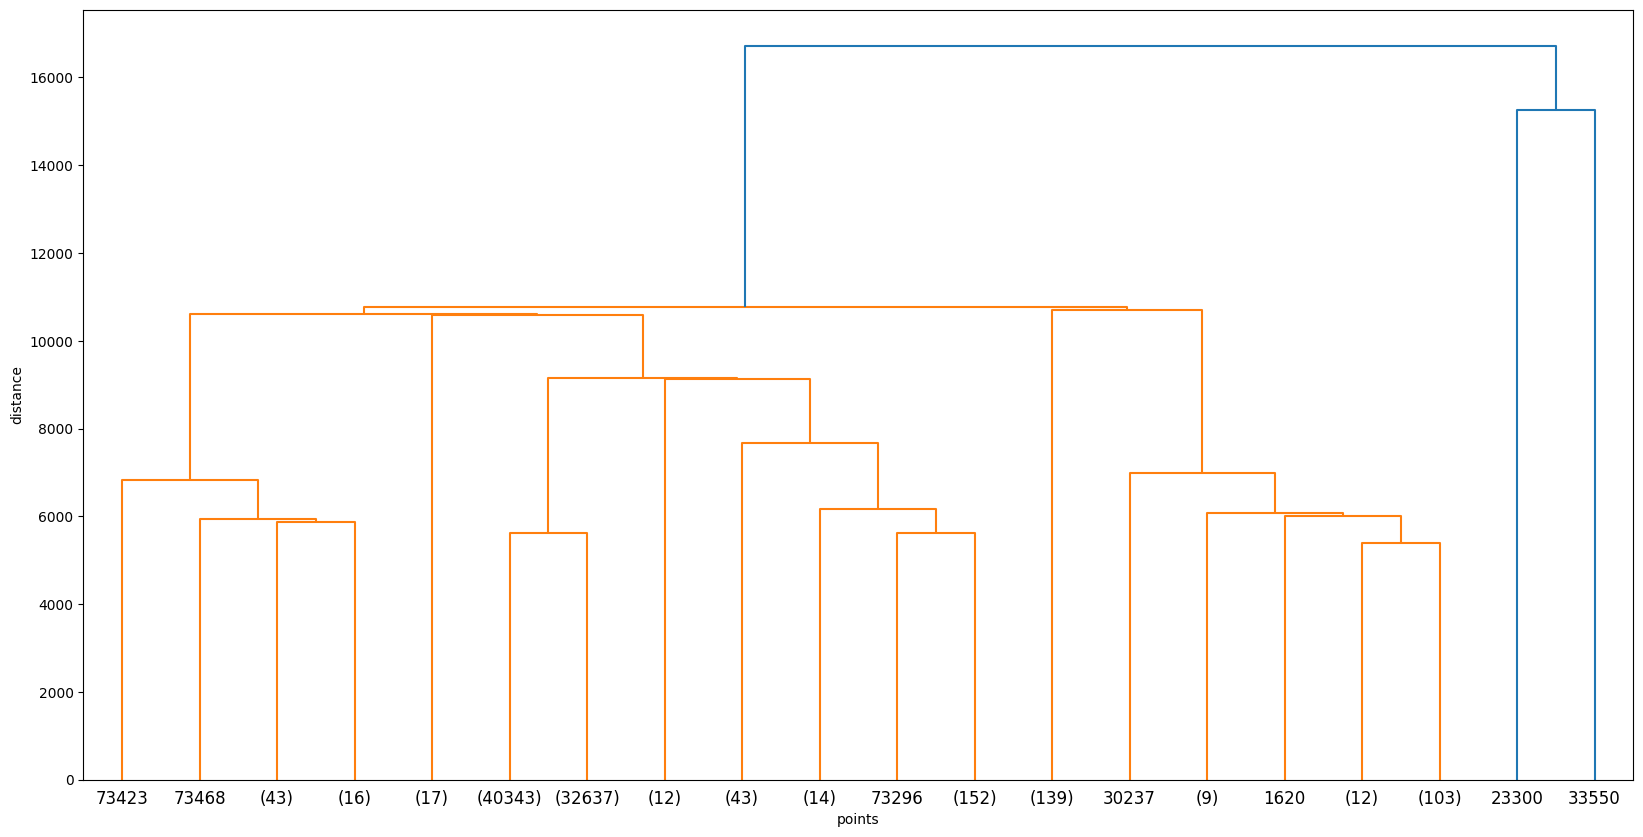

In [91]:
plt.figure(figsize=(20,10)) 
dendro = hierarchy.dendrogram(linkage_matrix, truncate_mode="lastp", p=20) 
plt.ylabel("distance") 
plt.xlabel("points");

Jak można zauważyć na dendogramie wyróżniają się szczególnie dwa klastry utworzone z pewnych punktów. Mają zdecydowanie większy dystans od pozostałych, co może świadczyć o dwóch najbardziej komunikujących się ze sobą hostach. Jednak oprócz nich można pod uwagę wziąć jeden kluster z bardzo małym dystansem od tych niżej, jednak mocno ze sobą połączony. Pod nim 3 kolejne klastry, które też dystansowo odstają od reszty. W takim wypadku również można pomyśleć, nie tylko o 2 hostach, a o 6 głównych hostach komunikujących się ze sobą.

#### Dla df_small

In [92]:
X = df_small[["Source", "Destination"]]
X

,Source,Destination
7,3232235545,577494354
9,577494354,3232235545
39,3232235545,577494354
41,577494354,3232235545
54,3232235545,34647058
...,...,...
73592,1108800260,3232235545
73633,3232235545,1108800260
73654,1108800260,3232235545
73665,3232235656,4026531834


In [93]:
scaled_X = scalerMinmax.fit_transform(X)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clusters_labels = model.fit_predict(scaled_X)

In [94]:
linkage_matrix = hierarchy.linkage(model.children_)

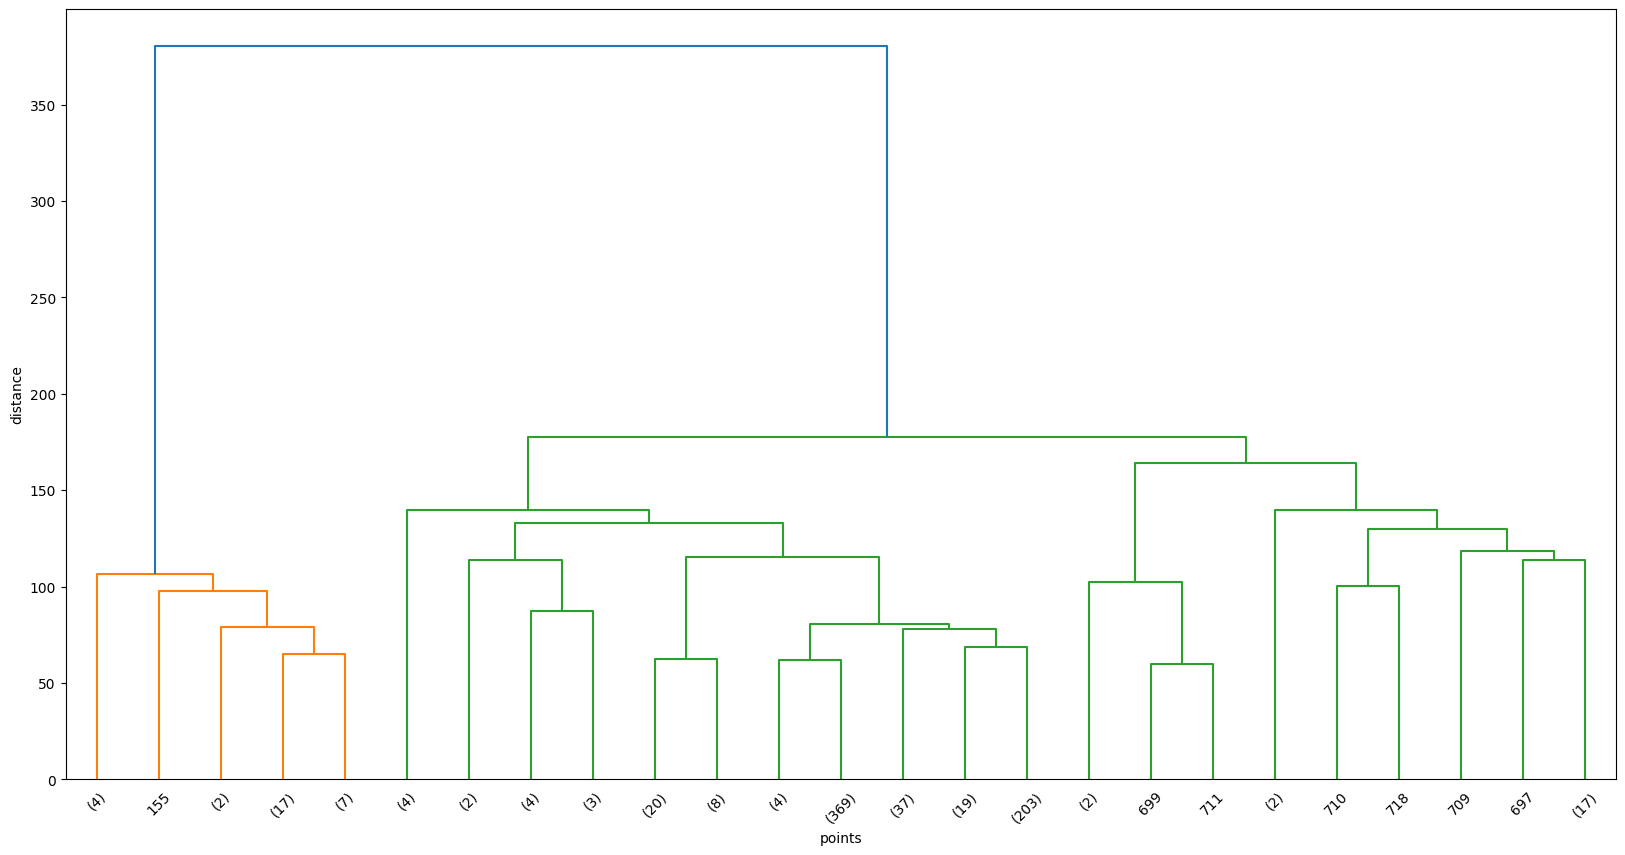

In [95]:
plt.figure(figsize=(20,10)) 
dendro = hierarchy.dendrogram(linkage_matrix, truncate_mode="lastp", p=25) 
plt.ylabel("distance") 
plt.xlabel("points");

Jak widac niektore punkty sie powtarzaja.  Powtarzające się punkty mogą wskazywać na istnienie subpopulacji lub odrębnych grup w danych. Subpopulacje te mogą charakteryzować się określonymi cechami lub zachowaniami. Powtarzające się wzorce mogą również odzwierciedlać zmienność.

Symetryczne wzorce na dendrogramie mogą wskazywać na symetrię w relacjach między klastrami, sugerując, że niektóre klastry mają podobne odległości lub podobieństwa od wspólnego punktu.

W tym przypadku widac najbardziej wysuniety jedne klaster co z wcześniejszej analizy, może wynikać częstą komunikacje między ip bramy domyślnej 192.168.0.25, tuż za nim klastry mają już niewielka róznicę dystansu.

Cięzko określić jaka ilość klastrów jest tu odpowiednia, gdyż wzięcie pod uwage tylko jendego klastra może być nie do końca poprawną interpretacją. Można bardziej już pomyśleć o 3 klastrach, które w porównaniu do pierwszego nie są tak mocno zdystansowane od siebie, jednak jest pomiędzy nimi różnica

#### Dla df_big

In [96]:
X = df_big[["Source", "Destination"]]
X

,Source,Destination
0,3232235545,3001784609
1,3232235545,3001784609
2,3001784609,3232235545
3,3001784609,3232235545
4,3232235545,577494354
...,...,...
73669,3232235545,2728363497
73670,2728363497,3232235545
73671,2728363497,3232235545
73672,2728363497,3232235545


In [97]:
scaled_X = scalerMinmax.fit_transform(X)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clusters_labels = model.fit_predict(scaled_X)

In [98]:
linkage_matrix = hierarchy.linkage(model.children_)

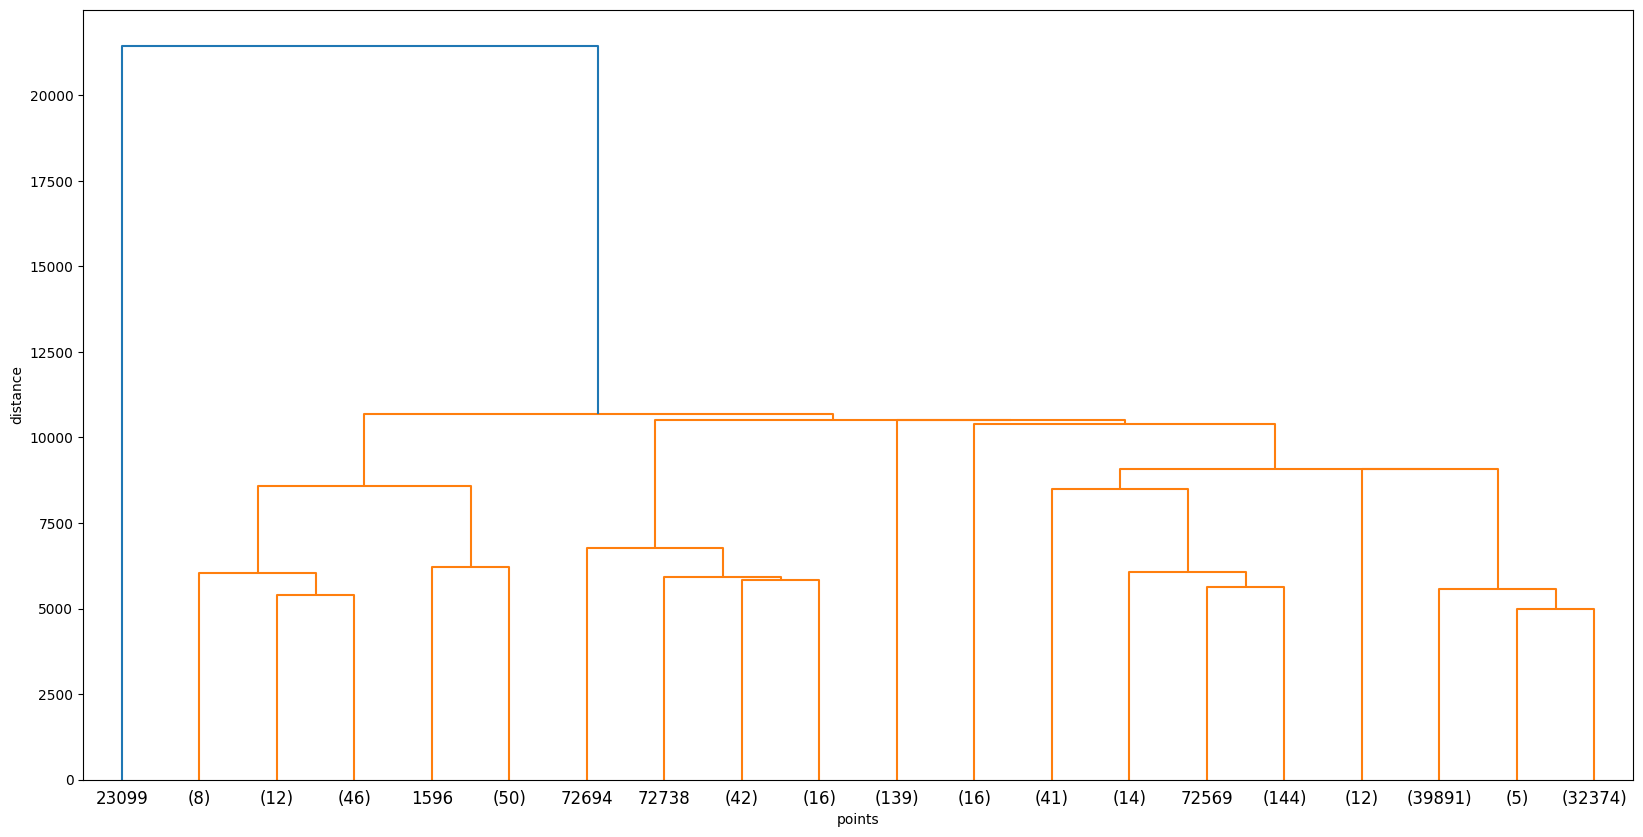

In [99]:
plt.figure(figsize=(20,10)) 
dendro = hierarchy.dendrogram(linkage_matrix, truncate_mode="lastp", p=20) 
plt.ylabel("distance") 
plt.xlabel("points");

W tym przypadku jak, w poprzednim widać jeden głowny klaster, daleko zdystansowanych od pozostałych, pewnie wynika to znów z faktu na częstą komunikacje się hostów spod jednych IP. 

Tutaj też nieprawdziwą interpretacją byłoby wzięcie pod uwagę jeden klaster, w tym przypadku sensowniejsze wydaje siię wzięcie 4 klastrów, które ze sobą są blisko zdystansowane, jednak dla pozostałych, dystans nie jest już tak niski

### Wnioski:

Metoda ta pozwala na szeroką własną interpretację jaka liczba klastrów tak naprawdę może być odpowiednia. Mimo, że czasem wnioski nasuwają się od razu patrząc na dany dendogram to ciężko uznać to za w 100% prawidłowy wybór. Gdy nie mamy jasno nasuniętych kierunków wyboru, trzeba wybrać taką odpowiedź jaka w danym kontekście mogłaby najbardziej pasować. 


### 3. Klasteryzacja zmiennych Source Port i Destination Port w celu zidentyfikowania klastrów reprezentujących określone usługi lub aplikacje na podstawie używanych portów.

In [100]:
X = df[["Source Port", "Destination Port"]]
scaled_X = scalerStandard.fit_transform(X)
X

,Source Port,Destination Port
0,43496.0,53.0
1,33972.0,53.0
2,53.0,43496.0
3,53.0,33972.0
4,40824.0,80.0
...,...,...
73670,443.0,60737.0
73671,443.0,60737.0
73672,443.0,60737.0
73673,60737.0,443.0


In [101]:
ssd = []
for k in range(1,15):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
ssd_basic = ssd
print("Odległości malejąco: ", ssd)

Odległości malejąco:  [147096.0000000017, 12452.076447593703, 7995.955342161727, 4504.9115468859945, 2802.0985551324147, 1980.0687067551394, 1443.5999803645618, 1074.9130757796304, 815.2403458959866, 618.16911241602, 459.6692286947501, 370.3384820134038, 295.8554343388087, 250.80194183227985]


SSD to suma kwadratów odległości między każdym punktem a centroidem w klastrze

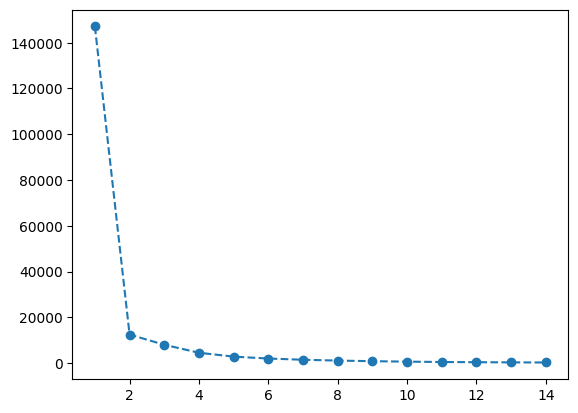

In [102]:
plt.plot(range(1,15), ssd, "o--");

Jak można zauwazyć tak jak w poprzednim przypadku jest wysoko odznaczony jeden klaster, podczas gdy inne tracą mało znacząco odległość. Jednak nie licząc tego mocno zauważalnego spadku istnieją mniejsze, ale też zauważające spadki.

Odległości malejąco:  [12452.076447593703, 7995.955342161727, 4504.9115468859945, 2802.170804552966, 1975.581828993671, 1618.76214090332, 1086.7772337963988, 814.9886438913213, 618.16911241602, 459.87638649865187, 370.34010682922354, 295.60068117607807, 250.80196506410306]


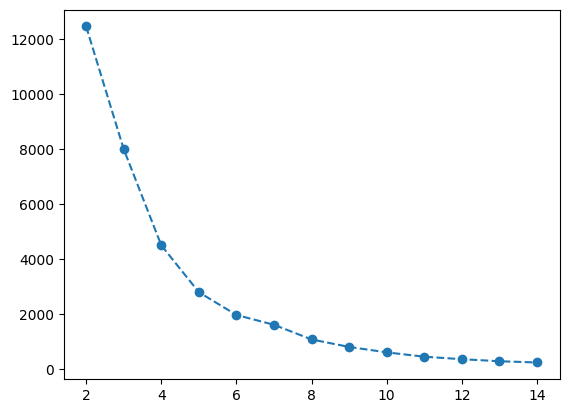

In [103]:
ssd = []
# Teraz wykres będzie widoczny od 2 klastra
for k in range(2,15):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_) 
    
print("Odległości malejąco: ", ssd)
plt.plot(range(2,15), ssd, "o--");

W tym przypadku wybór pomiędzy 5 a 6 klastrem byłby znaczący.

Odległości malejąco:  [2805.302184603012, 1975.5859652410463, 1443.5999803645618, 1103.8525859232927, 814.8224530815362, 630.2296051598685, 459.66903681134335, 370.34425459548953, 295.60066507382027, 250.80258809207837, 219.5990405966171, 190.86768923231256, 166.1365275326175, 145.60514149051994, 128.17573660785686, 111.79659060893368, 102.21146230117506, 93.51225001592523, 83.3822051849874, 74.83253951810532]


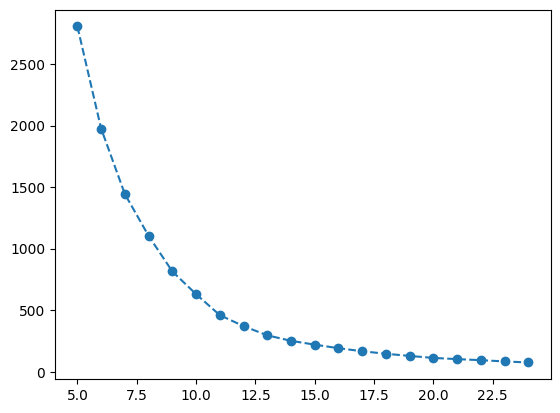

In [104]:
ssd = []
# Teraz wykres będzie widoczny od 5 do 25 klastra
for k in range(5,25):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_) 
print("Odległości malejąco: ", ssd)
plt.plot(range(5,25), ssd, "o--");

A przesuwając jeszcze dalej obserwacje mozna by bylo powiedzieć, że wybór nawet 11 klastrów mógłby być korzystny

W kontekście danych, które mają wiecej wartości ciężko jednoznacznie powiedzieć ile głownych usług lub aplikacji mogłybyć używane, zależy to przedewszystkim też jakie protokoły mogły wtedy występować. 

#### Warto przyjrzeć się jak to wygladało dla danych zawierających poszczególne protokoły, które miały mniejszy udział w ruchu sieciowym

In [105]:
X = df_small[["Source Port", "Destination Port"]]
scaled_X = scalerStandard.fit_transform(X)
X

,Source Port,Destination Port
7,40824.0,80.0
9,80.0,40824.0
39,40836.0,80.0
41,80.0,40836.0
54,47674.0,80.0
...,...,...
73592,50027.0,44257.0
73633,44257.0,50027.0
73654,50027.0,44257.0
73665,59430.0,1900.0


Odległości malejąco:  [1463.9999999999986, 683.8063491416758, 204.19750094162768, 70.673167767698, 38.560331060664566, 20.95984406700746, 17.732175057923982, 14.853528654942183, 12.167169840067036, 9.947492180174745, 7.91523458077646, 6.778924035280057, 5.686309818469334, 4.537982347915172]


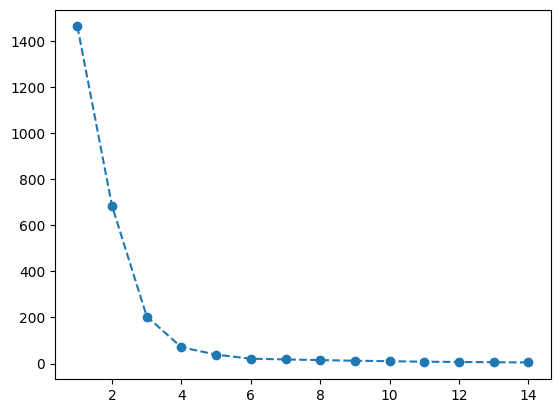

In [106]:
ssd = []
for k in range(1,15):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
print("Odległości malejąco: ", ssd)
plt.plot(range(1,15), ssd, "o--");

Tutaj znaczące spadki obserwujemy dla 3 pierwszych klastrów, dalej te odległości zanikają. Jednak warto przyjrzeć się mniejszym odległościom

Odległości malejąco:  [204.19750094162768, 70.673167767698, 38.560331060664566, 20.959844067007456, 17.740188276784444, 14.853528654942187, 12.175841680392802, 9.947492180174745, 7.923900303102904, 6.7875897576065025, 5.682958615738021, 4.555600226236446, 3.8432071460460406, 3.2419397083299684, 2.606965795057747, 2.1433805079387764, 1.5507952724431813]


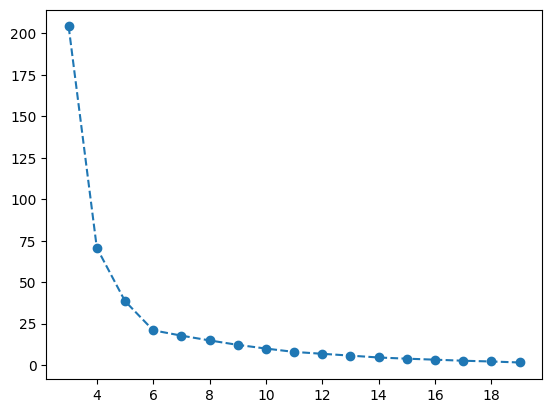

In [107]:
ssd = []
for k in range(3,20):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
print("Odległości malejąco: ", ssd)
plt.plot(range(3,20), ssd, "o--");

Tu można zdecydowanie zauważyć, że po 6 klastrze, dystans spada wolno i liniowo więc w tym przypadku liczba klastrów 6, może być uznana za odpowiedni

#### Teraz można przyjrzeć się ramce danych zawierające prtokoły w liczbe danych protokołów w wiekszej ilości

In [108]:
X = df_big[["Source Port", "Destination Port"]]
scaled_X = scalerStandard.fit_transform(X)
X

,Source Port,Destination Port
0,43496.0,53.0
1,33972.0,53.0
2,53.0,43496.0
3,53.0,33972.0
4,40824.0,80.0
...,...,...
73669,60737.0,443.0
73670,443.0,60737.0
73671,443.0,60737.0
73672,443.0,60737.0


Odległości malejąco:  [145631.99999999302, 11356.375065704045, 7028.780352787698, 3756.9437463909485, 2127.1979207336494, 1425.66020687206, 1161.27384303855, 799.1848419985903, 603.6649157066967, 446.87773260984034, 359.8979939418771, 284.88952126542733, 240.85619652216366, 211.47679485882156]


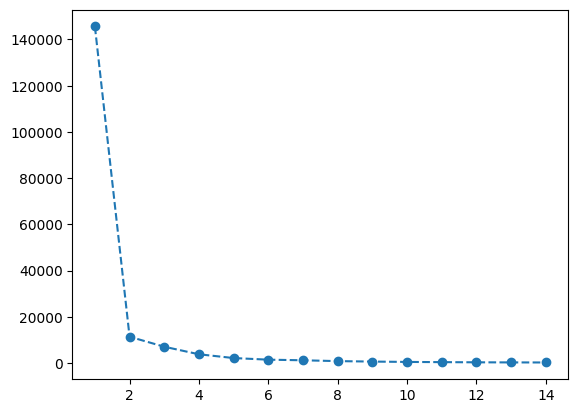

In [109]:
ssd = []
for k in range(1,15):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
ssd_big = ssd
print("Odległości malejąco: ", ssd)
plt.plot(range(1,15), ssd, "o--");

Na pierwszy rzut oka, wykres wygląda identycznie do pierwszego utworzonego dla pierwotnej ramki danych. Nie jest to mocno zaskakujące ponieważ wiadomo, że mocną role odgrywają te czynniki, których znajduje się najwięcej w ramce danych, Jednak to nie znaczy, że nie różnią się w ogólne. W zestawieniu można porównać oba wyniki ssd.

In [110]:
zestawienie = list(zip(ssd_basic, ssd_big))
pd.DataFrame(zestawienie, columns=['ssd_basic', 'ssd_big'])

,ssd_basic,ssd_big
0,147096.000000,145632.000000
1,12452.076448,11356.375066
2,7995.955342,7028.780353
3,4504.911547,3756.943746
4,2802.098555,2127.197921
5,1980.068707,1425.660207
6,1443.599980,1161.273843
7,1074.913076,799.184842
8,815.240346,603.664916
9,618.169112,446.877733


Rożnica ta jest naprawde ledwo zauważalna bo czasem jej nie ma a czasem liczona jest w setkach po przecinku, Jednak najabrdziej róznicę da się wyłapać patrząc na wiersz oznaczony 7, gdzie dla ssd_basic:811.810330, a ssd_big: 799.449573

Klasteryzacja zmiennych Source Port i Destination Port w celu zidentyfikowania klastrów reprezentujących określone usługi lub aplikacje na podstawie używanych portów.

#### Wnioski:

Metoda KMean pozwala również na szeroką własną interpretację odległości lub wykresu z nimi zawartego na to  jaka liczba klastrów może być odpowiednia. Wnioski tak samo jak w poprzedniej metodzie mogą wydawać się jednoznaczne, jednak czym dalej analizujemy tym mogą okazać się nie takie oczywiste. 

### 4. Time, Length, Delta time, Dlugość pakietu zależne do czasu

Kombinacja tych trzech kolumn, pomoże określić czy istnieje zależność długości pakietu zważając długość trwania poszczególnych pakietów. To może pomóc w zrozumieniu, czy istnieją okresy, w których transmisje są bardziej intensywne lub mniej intensywne

Kombinacja tych trzech kolumn może również pomóc w identyfikacji anomalii czasowych, czyli sytuacji, w których występują nietypowe lub podejrzane zdarzenia w czasie.


In [136]:
X = df[["Time", "Delta Time", "Length"]]
scaled_X = scalerStandard.fit_transform(X)
X

,Time,Delta Time,Length
0,0.000000,0.000000e+00,95
1,0.002261,2.260542e-03,95
2,0.017178,1.491701e-02,206
3,0.023388,6.210275e-03,218
4,0.118220,9.483231e-02,74
...,...,...,...
73670,332.620941,1.910867e-02,66
73671,332.675208,5.426698e-02,638
73672,332.675208,2.130000e-07,72
73673,332.675412,2.037380e-04,87


Odległości malejąco:  [220643.99999999994, 163093.95261101896, 121222.2611250555, 80584.52112179654, 63065.967822013044, 48977.1722660595, 39539.06997285273, 34147.87566404854, 29162.6655152575, 25618.6858161485, 23377.561831733892, 20626.321096243915, 18277.517720426113, 16634.17607615814, 15177.197284172631, 13653.654457060346, 13041.767655864876, 11963.285379230287, 11049.933464045891, 10461.543029374145]


Text(0, 0.5, 'SSD')

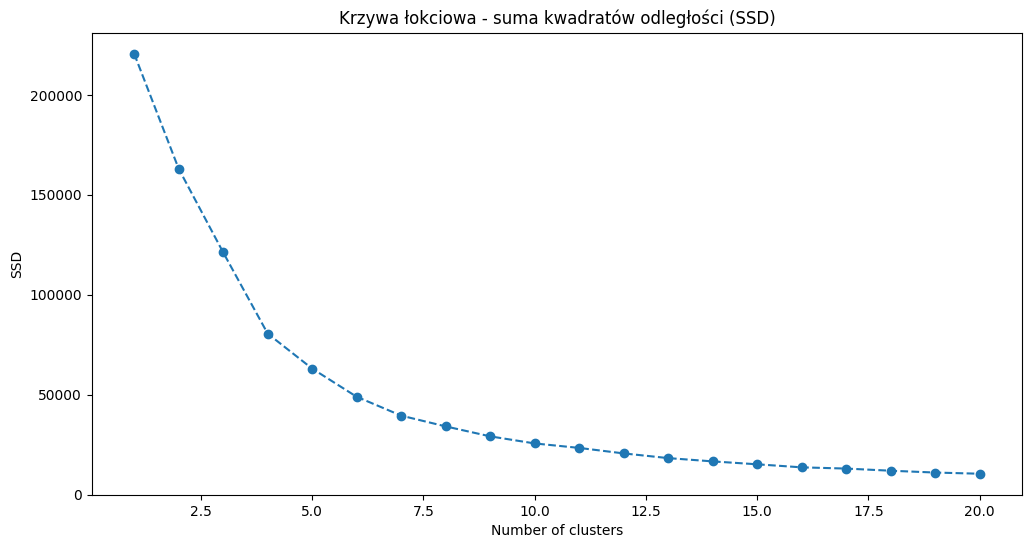

In [145]:
ssd = []
for k in range(1,21):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
print("Odległości malejąco: ", ssd)
plt.figure(figsize=(12, 6))
plt.plot(range(1,21), ssd, "o--");
plt.title("Krzywa łokciowa - suma kwadratów odległości (SSD)")
plt.xlabel('Number of clusters')
plt.ylabel('SSD')

Jak widać ostry spadek jest do klastra 4, mimo tego przy dalszej ilości klastrów wciąż istnieje ciągły zauważalny spadek. Można by było przyjąc, że optymalna liczba klastrów w tym przypadku jest w przedziale 4-6, Jednak warto sprawdzić jak się zachowuje wykres odległości dla większej ilości klastrów.

Wynik Silhouette Score jest obliczany dla poszczególnych punktów danych na podstawie odległości do innych punktów w tym samym klastrze i do najbliższego sąsiedniego klastra. To obliczenie wymaga co najmniej dwóch klastrów, aby dokonać znaczących porównań. Wynik Silhouette Score waha się od -1 do 1, a wyższy wynik wskazuje na lepiej zdefiniowane klastry.

Dla klastra: 2, średni wynik silhouette wynosi: 0.4994723488706354
Dla klastra: 3, średni wynik silhouette wynosi: 0.5043243544479716
Dla klastra: 4, średni wynik silhouette wynosi: 0.5533475087574733
Dla klastra: 5, średni wynik silhouette wynosi: 0.5553450638833022
Dla klastra: 6, średni wynik silhouette wynosi: 0.5614262033605845
Dla klastra: 7, średni wynik silhouette wynosi: 0.4423848050320129
Dla klastra: 8, średni wynik silhouette wynosi: 0.45925032533228205
Dla klastra: 9, średni wynik silhouette wynosi: 0.45618525445805297
Dla klastra: 10, średni wynik silhouette wynosi: 0.41489925457878174
Dla klastra: 11, średni wynik silhouette wynosi: 0.4248914253988216
Dla klastra: 12, średni wynik silhouette wynosi: 0.4304011435756287
Dla klastra: 13, średni wynik silhouette wynosi: 0.4438169206689228
Dla klastra: 14, średni wynik silhouette wynosi: 0.43683305712265696
Dla klastra: 15, średni wynik silhouette wynosi: 0.4668634304346899
Dla klastra: 16, średni wynik silhouette wynosi: 0.4

Text(0, 0.5, 'Silhouette Score')

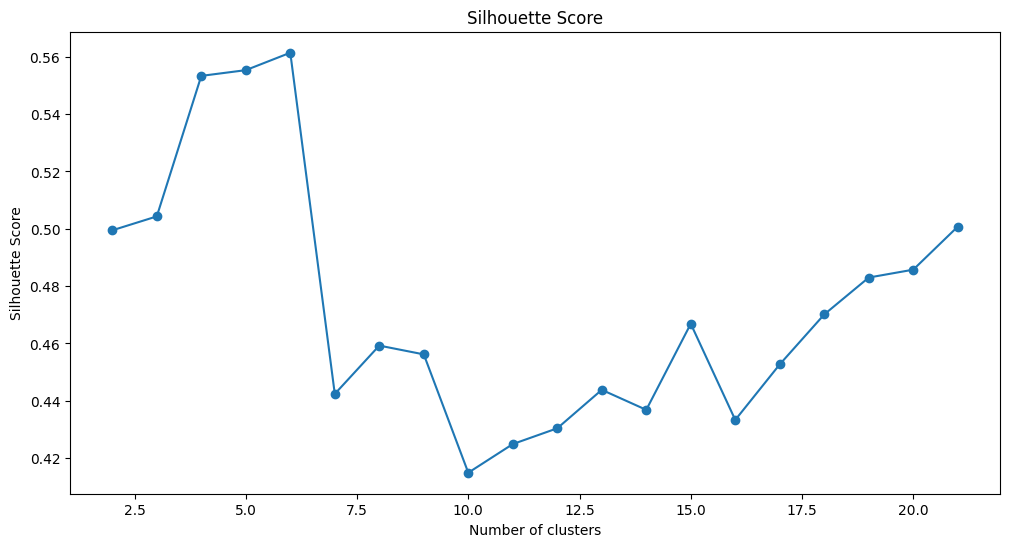

In [146]:
ssd_silhouette = []
silhouette_scores = []
for k in range(2, 22):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_X)
    ssd_silhouette.append(model.inertia_)
    silhouette_avg = silhouette_score(scaled_X, model.labels_)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Dla klastra: {k}, średni wynik silhouette wynosi: {silhouette_avg}")
    
plt.figure(figsize=(12, 6))    
plt.plot(range(2, 22), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

Patrząc na wynik silhouette, rośnie on od początku wykresu i osiąga największą wartość przy klastrze 6 po czym gwałtownie spada i przez wiele klastrów utrzymuje się w wartościach od okolo 0.41 do 0.46, jednak znów od klastra 16 zaczyna rosnąć

Patrząc na dany wynik silhouette oraz ssd, można twierdzić, że najbardziej korzystna liczba klastrów wynosi 6.

Warto jednak popatrzeć jak zachowują się dane wartości dla większej ilości klastrów

Odległości malejąco:  [11731.268664505267, 11285.281234007438, 10712.282098334374, 9832.339651583861, 9163.689842767735, 8617.10956076571, 8043.209790120984, 7667.004311275295, 7179.914315980377, 6748.588480371429, 6499.0444928857705, 6170.82574994557, 5902.559031369741, 5784.760107419338, 5444.599750453364]


Text(0, 0.5, 'SSD')

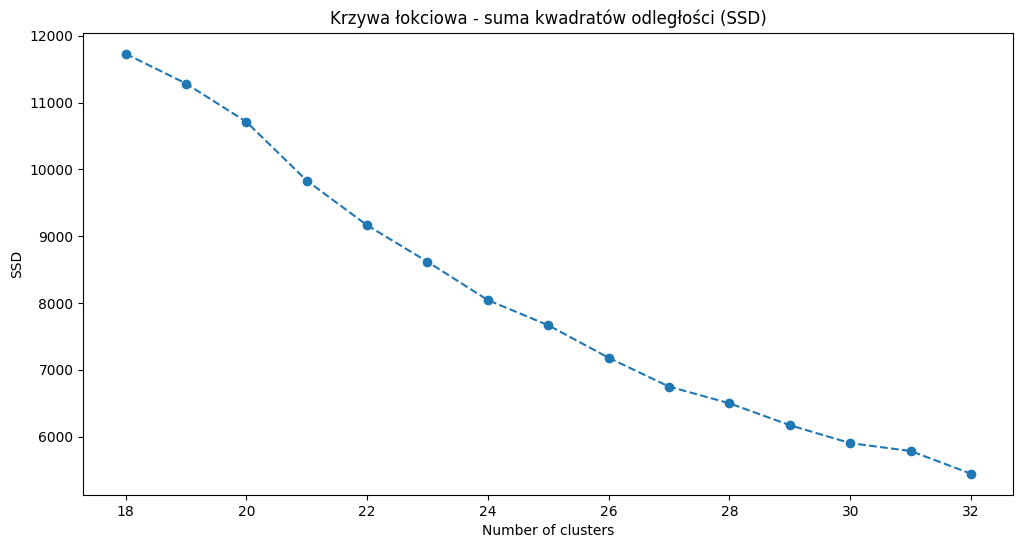

In [148]:
ssd = []
for k in range(18,33):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
print("Odległości malejąco: ", ssd)
plt.figure(figsize=(12, 6))
plt.plot(range(18,33), ssd, "o--");
plt.title("Krzywa łokciowa - suma kwadratów odległości (SSD)")
plt.xlabel('Number of clusters')
plt.ylabel('SSD')

Tutaj widać, że ciągły spadek nieustannie istnieje, mimo że nie jest on już tak spektakularny to wciąż odległości między klastrami jest dość spora. Wygląda , że istnieje jeszcze większa ilośc klastrów które mogłyby określać zależność między zmiennymi Time, Length, Delta time.

Dla klastra: 19, średni wynik silhouette wynosi: 0.4829918051794332
Dla klastra: 20, średni wynik silhouette wynosi: 0.48573887450630054
Dla klastra: 21, średni wynik silhouette wynosi: 0.5007506156150383
Dla klastra: 22, średni wynik silhouette wynosi: 0.502902047719642
Dla klastra: 23, średni wynik silhouette wynosi: 0.5050271058909024
Dla klastra: 24, średni wynik silhouette wynosi: 0.525408328969638
Dla klastra: 25, średni wynik silhouette wynosi: 0.5333396365833833
Dla klastra: 26, średni wynik silhouette wynosi: 0.5397056019573478
Dla klastra: 27, średni wynik silhouette wynosi: 0.54567804800167
Dla klastra: 28, średni wynik silhouette wynosi: 0.5555484634690055
Dla klastra: 29, średni wynik silhouette wynosi: 0.5498686134026732
Dla klastra: 30, średni wynik silhouette wynosi: 0.5506004737730437
Dla klastra: 31, średni wynik silhouette wynosi: 0.5510355011980144
Dla klastra: 32, średni wynik silhouette wynosi: 0.5509053892878002
Dla klastra: 33, średni wynik silhouette wynosi: 0.

Text(0, 0.5, 'Silhouette Score')

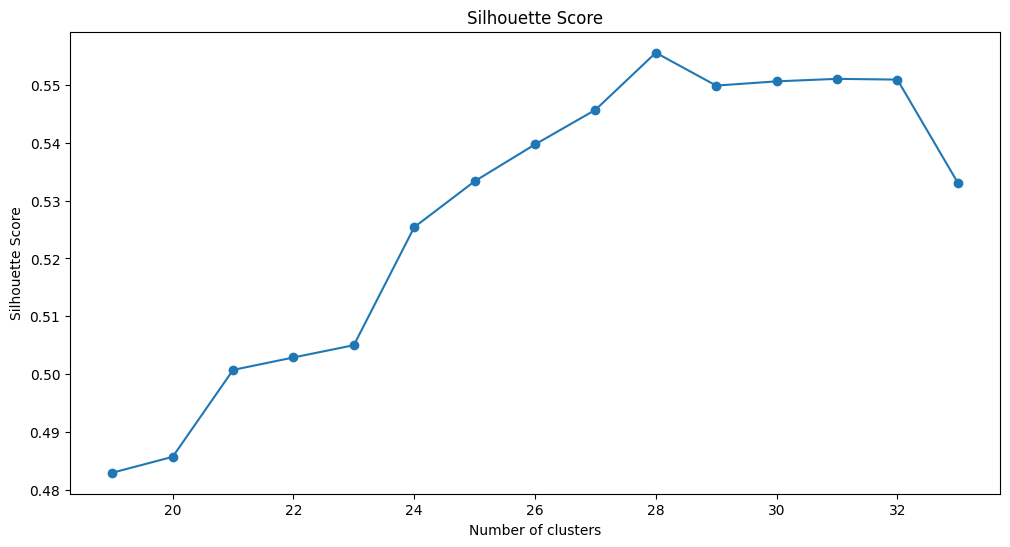

In [149]:
ssd_silhouette = []
silhouette_scores = []
for k in range(19, 34):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_X)
    ssd_silhouette.append(model.inertia_)
    silhouette_avg = silhouette_score(scaled_X, model.labels_)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Dla klastra: {k}, średni wynik silhouette wynosi: {silhouette_avg}")
    
plt.figure(figsize=(12, 6))    
plt.plot(range(19, 34), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

Przy 28 klastrze Silhouette Score osiąga znów wysoki wynik bo 0.55 co jest niewiele gorszym wynikiem od tego na 6 klastrze. Wartości dla większej ilości klastrów nie słabną już tak mocno jak w poprzednim przypadku.

Zważając na wynik Silhouette, moża by było przydzielic danym nawet 28 klastrów osiągając możliwie dobry rezultat, mimo że dwa najlepsze ilości klastrów róznią się od siebie ilością 22.



Jak widać im więcej klastrów tym spadek nie ustaje, chociaż widoczne kolano istnieje między około 18 klastrem. Ciężko tak naprawde przyjąć w tym przypadku jaka liczba klastrów powinna być odpowiednia, trzeba mieć pewne założenia by móc to poprawnie określić.

6 pierwsze klastry posiadający  ostry spadek może wskazywać na istotną zmianę w dynamice transmisji. To może być związane z określonymi okresami intensywnej komunikacji lub różnicami w charakterze transmisji. Ostry spadek może również oznaczać, że w tej liczbie klastrów dane są najlepiej reprezentowane z punktu widzenia identyfikacji nietypowych zdarzeń w czasie.

Sprawdźmy jak model przydziela klastry do danych

In [150]:
model = KMeans(n_clusters=6, random_state=8)
cluster_labels = model.fit_predict(scaled_X)

In [151]:
data_with_labels = pd.DataFrame(data=X, columns=['Time', 'Length','Delta Time']) 
data_with_labels['KMeans_Cluster'] = cluster_labels
data_with_labels

,Time,Length,Delta Time,KMeans_Cluster
0,0.000000,95,0.000000e+00,0
1,0.002261,95,2.260542e-03,0
2,0.017178,206,1.491701e-02,0
3,0.023388,218,6.210275e-03,0
4,0.118220,74,9.483231e-02,0
...,...,...,...,...
73670,332.620941,66,1.910867e-02,1
73671,332.675208,638,5.426698e-02,1
73672,332.675208,72,2.130000e-07,1
73673,332.675412,87,2.037380e-04,1


In [152]:
data_with_labels["KMeans_Cluster"].value_counts()

KMeans_Cluster
0    47168
1    24261
4     1868
2      134
3      108
5        9
Name: count, dtype: int64

Jak widać największa liczba danych przypada na klaster 1 i 0, warto sprawdzić jakie wartości zachodzą w innych kolumnach by okreśłić wybór klastrów.

In [153]:
def random_sample(group):
    return group.sample(min(rows_per_cluster, len(group)))

In [155]:
selected_clusters = [0, 1, 2, 3, 4, 5]
rows_per_cluster = 4
selected_df = data_with_labels[data_with_labels["KMeans_Cluster"].isin(selected_clusters)]
rand_clusters = selected_df.groupby("KMeans_Cluster", group_keys=False).apply(random_sample)
rand_clusters

,Time,Length,Delta Time,KMeans_Cluster
17405,65.201285,66,2.411800e-05,0
8103,27.147088,1399,6.300000e-08,0
10766,40.649909,66,2.081140e-04,0
30326,95.920846,1292,2.600000e-08,0
55823,220.448580,191,8.198744e-03,1
65124,269.321318,217,1.679786e-03,1
52992,207.671079,108,1.831888e-02,1
51159,181.588492,74,3.021650e-04,1
71633,302.082991,74,3.333511e-01,2
73663,331.996751,66,6.041537e-01,2


Z tego co można stwierdzić z ramki danych:
- dla klastra 3 i 4 algorytm najbardziej "Length" czyli długością pakietu, który jest owiele dłuższy niż w pozostałych przypadkach. Jednak dla klastra 3 długość pakietów jest owiele większa.
- dla klastra 5 algorytm kierował się najbardziej wartością Delta Time, który jest większt niż w pozostałych przypadkach. Chociaż dla klastra 2 wynik ten nie jest dużo niższy
- Dla klastra 1 "Time" czyli czas podczas sesji miał prawdopodobnie duży wpływ jednak z pewnością w miarę nieduża długośc pakietu też mogła mieć wpływ
- Dla klastra 0 algorytm, kierował się prawdopodbnie, również wartością Delta Time tylko w tym przypadku wartość ta jest dużo mniejsza

Sprawdźmy teraz różnice w wynikach przy ilości klastrów w liczbie 18.

In [156]:
model = KMeans(n_clusters=28, random_state=8)
cluster_labels = model.fit_predict(scaled_X)

In [157]:
data_with_labels = pd.DataFrame(data=X, columns=['Time', 'Length','Delta Time']) 
data_with_labels['KMeans_Cluster'] = cluster_labels
data_with_labels

,Time,Length,Delta Time,KMeans_Cluster
0,0.000000,95,0.000000e+00,26
1,0.002261,95,2.260542e-03,26
2,0.017178,206,1.491701e-02,26
3,0.023388,218,6.210275e-03,26
4,0.118220,74,9.483231e-02,18
...,...,...,...,...
73670,332.620941,66,1.910867e-02,11
73671,332.675208,638,5.426698e-02,11
73672,332.675208,72,2.130000e-07,11
73673,332.675412,87,2.037380e-04,11


In [158]:
data_with_labels["KMeans_Cluster"].value_counts()

KMeans_Cluster
9     11477
10     7817
1      7513
6      6701
11     6097
19     5651
0      5644
16     5231
21     4576
26     3652
17     3642
23     1928
25      780
12      728
4       548
15      497
18      413
14      212
24      148
8        85
7        73
27       42
20       35
3        26
2        20
13        6
22        4
5         2
Name: count, dtype: int64

Jak widać nie ma znaczącej przewagi dwóch klastrów nad pozotałymi. Dla 11 klastrów różnica w ilości danych nie jest tak duża jak przy pozostałych.

Warto sprawdzić jakie wartości zachodzą w kolumnach dla klastrów  dla tych klastrów , najpierw dla 12 z największą ilościa danych a pozniej dla pozostałych

In [170]:
selected_clusters = [9, 10, 1, 6, 11, 19, 0, 16, 21, 26, 17, 23]
rows_per_cluster = 2
selected_df = data_with_labels[data_with_labels["KMeans_Cluster"].isin(selected_clusters)]
rand_clusters = selected_df.groupby("KMeans_Cluster", group_keys=False).apply(random_sample)
rand_clusters

,Time,Length,Delta Time,KMeans_Cluster
56640,229.765991,1399,8.262700e-05,0
59505,237.632995,1112,7.772478e-03,0
18287,67.213528,66,2.347100e-05,1
23527,78.441705,78,-4.055400e-05,1
47479,158.174278,80,2.629530e-04,6
42720,149.913384,82,1.510036e-03,6
27869,95.055367,1292,2.500000e-08,9
25429,92.805820,1292,1.900000e-08,9
4988,14.800008,1399,2.591810e-04,10
6981,23.863758,1399,1.219790e-04,10


Ciężko w tych przypadkach wyłapać zachodzące róznice, aczkolwiek dla algorytmu są one bardziej jasne.

Sprawdźmy dodatkowo jakie zależności zachodzą również dla pozostałych klastrów

In [171]:
selected_clusters = [25, 12, 4, 15, 18, 14, 24, 8, 7, 27, 20, 3, 2, 13, 22, 5]
rows_per_cluster = 2
selected_df = data_with_labels[data_with_labels["KMeans_Cluster"].isin(selected_clusters)]
rand_clusters = selected_df.groupby("KMeans_Cluster", group_keys=False).apply(random_sample)
rand_clusters

,Time,Length,Delta Time,KMeans_Cluster
52668,199.577873,102,1.002303,2
39329,116.271614,66,1.146691,2
38693,108.523015,65226,0.000104,3
38758,108.535307,65226,0.002190,3
16744,62.010715,11550,0.000675,4
40553,124.953028,8754,0.000115,4
24998,92.173140,106,3.550994,5
52761,205.260507,1179,3.680299,5
52942,206.946794,1292,0.350259,7
51330,184.504442,86,0.408889,7


Tutaj przypadki bywają bardziej skrajne i odrazu w oczy rzucają się czynniki, które wpływały na ustalenie danego klastra. Np dla klastrów numer 22, 13, 5 i 2 jest to odstający od reszty duży Delta Time, a dla klastrów 27, 15, 8 i 2odbiegające też od normy wartości Length

Czy więc lepszym wyborem jest wybór 6 czy 28 klastrów?. Ciężko jak zawsze powiedzieć, aczkolwiek wydaje się, żę przy większej ilości klastrów róznice są bardziej widoczne.

#### Wnioski

Połączenie Kmeans z dwoma metodami do ustalania optymalnej liczby klastrów wydaję się być bardziej sensowna, niż używając tylko jeden. Jest to dużo łatwiejsze do ustalenia niż w pozostałych przypadkach

## Wnioski końcowe

Wszystkie przytoczone tutaj metody mają swoje plusy jak i minusy. Można każdą z nich rozbudować w taki sposób, by pozyskać sensowene odpowiedzi, jednak często też wiąże się to z dłuższym obliczaniem przez algorytm danego modelu, nie zawsze pozwalają na to podzespoły komputera. Do najbardziej czasochłonnego w obliczeniach algorytmu, można postawić Hierachical Clustering. Przy takiej ilości danych bardzo cięzko mu zbudować dendogram, a co za tym idzie zwizualizować go, jednak model pozwala na szeroką analize wyników. DBSCAN, również jest bardziej kosztowny obliczeniowo, można nawet powiedzieć, że przy większej ilości parametrów oraz ich wielkości, potrzeba naprawdę dobrego sprzętu (Ten na którym został często liczony, mocno ograniczała liczba ramu o wielkości 16, więc przez to wyskakiwał częśto tzw. "MemoryError"). Ciężko mi tutaj mówić o jego plusach w kontekście posiadanych obszernych danych na, których nie można było potestować wielu parametrów. Wiem, że model ten bardzo dobrze sobie radzi na mniejszych danych, gdzie istotne też jest występowanie takich zdarzeń jak anomalie, ponieważ łatwo potrafi je rozdzielić. Natomiast KMean okazuje się być dla takiej ilości danych najskuteczniejszy, najmniej wymagający oraz najszybszy. Model ogranicza tylko niemożność wybrania parametrów jak w DBSCAN, aczkowliek przy różnych metodach testowych, potrafi on wskazać na poprawne wyniki.